<a href="https://colab.research.google.com/github/Hamid-Mofidi/PNP/blob/main/Q2contribution/Q2-2nd-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PNP: Higher order contributions of permanent charge on ionic flows

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [3]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [4]:
def calculate_voltage_ranges(L, R):
    alpha = 1/3
    beta = 2/3
    z1 = 1
    z2 = -1

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    Vq1 = (np.log(R) - np.log(L)) / (z2 * (1 - B))
    Vq2 = (np.log(R) - np.log(L)) / (z1 * (1 - B))

    Vqmin = np.min([Vq1, Vq2])
    Vqmax = np.max([Vq1, Vq2])

    V1_range = np.linspace(Vqmin-80, Vqmin, 200)
    V2_range = np.linspace(Vqmin, Vqmax, 200)
    V3_range = np.linspace(Vqmax, Vqmax+80, 200)

    return alpha, beta, z1, z2, V1_range, V2_range, V3_range



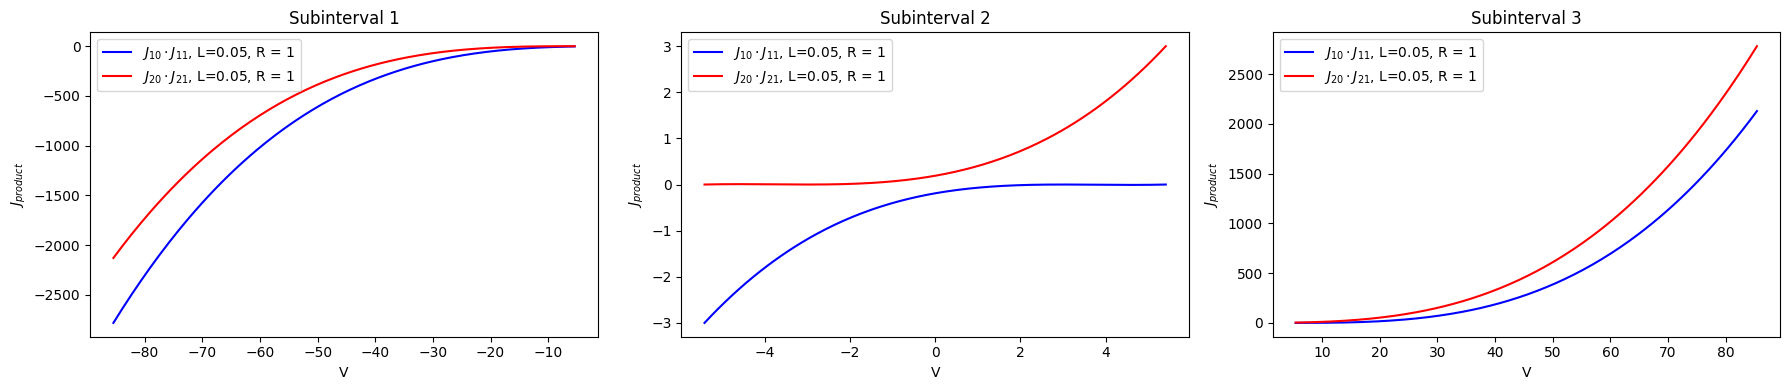

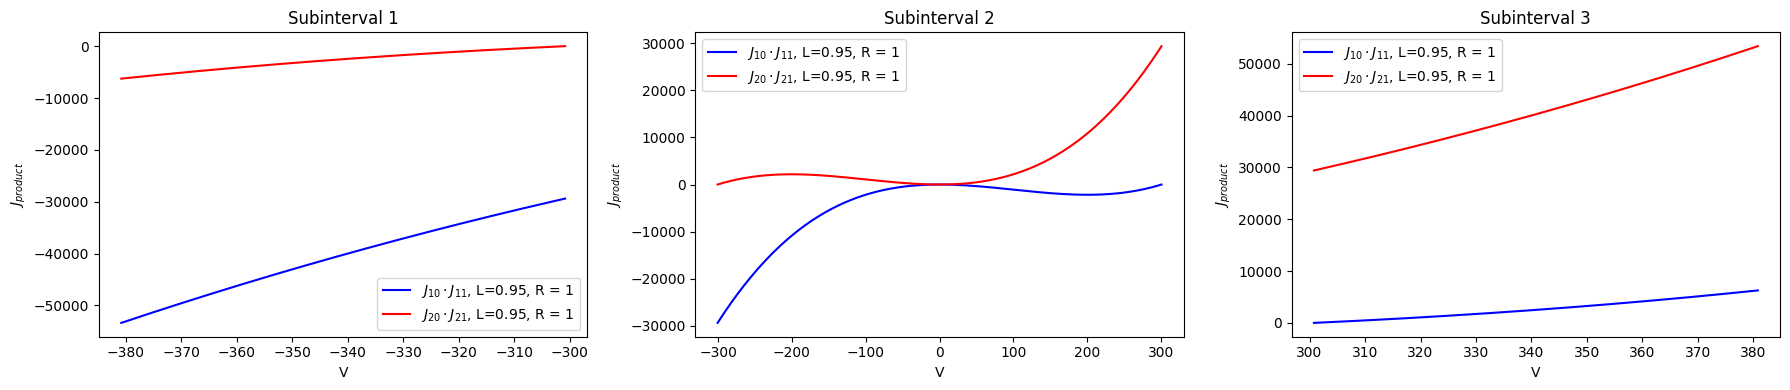

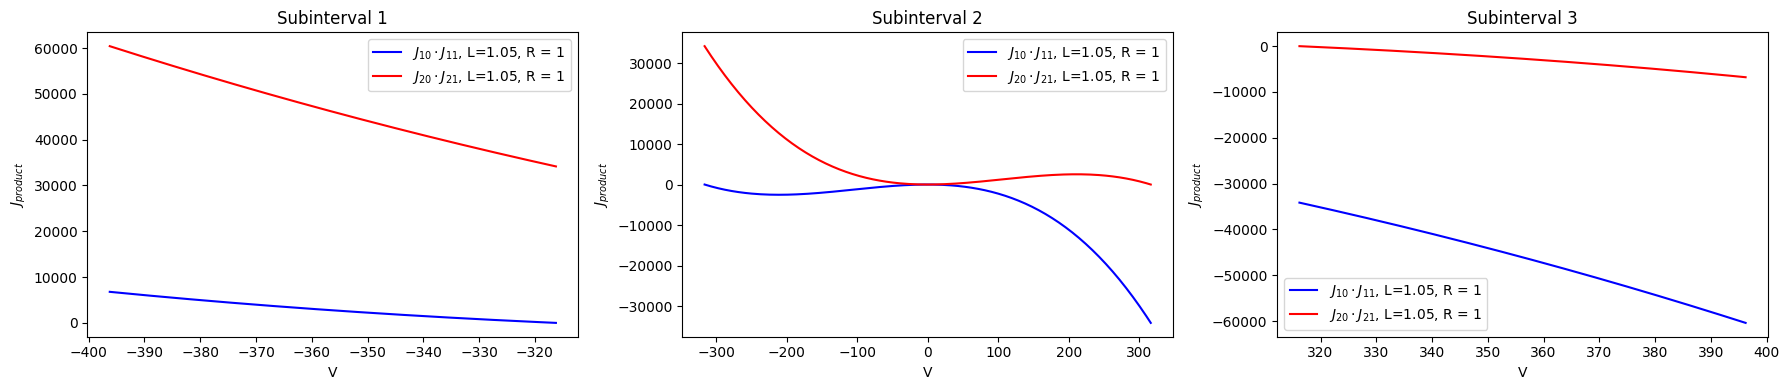

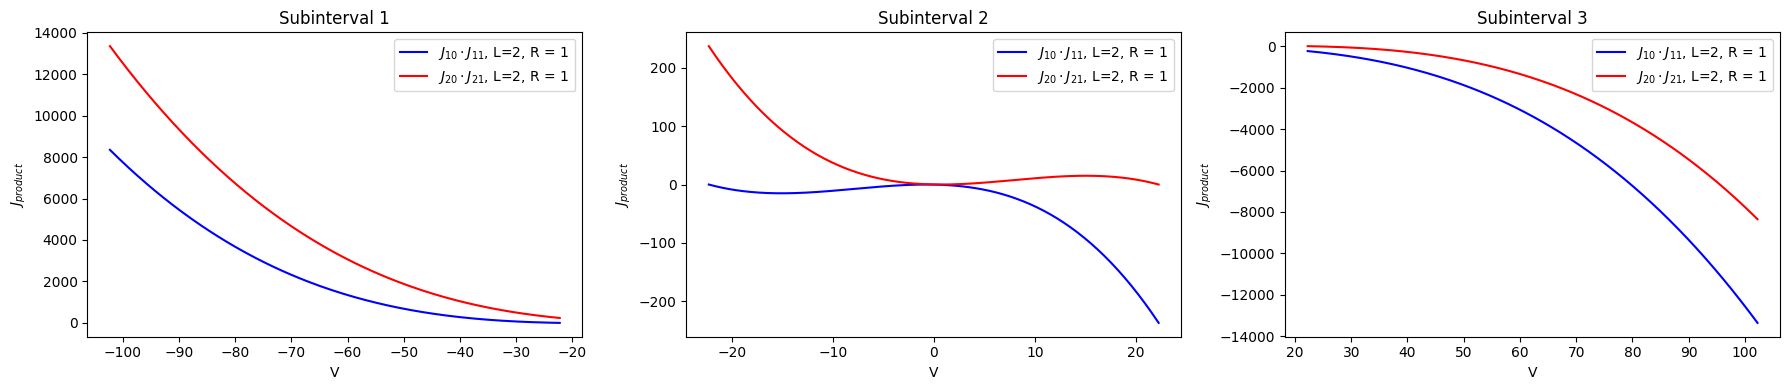

In [5]:
# Define the parameter values

R = 1
for L in [0.05,  0.95, 1.05,  2]:
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

    # Create a list of V ranges
    V_ranges = [V1_range, V2_range, V3_range]

    # Iterate over the ranges and call zeroth_order_terms
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    mag = 0

    # Iterate over the ranges and call zeroth_order_terms
    for i, V_range in enumerate(V_ranges, 1):
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
        Q = 0.01
        J1_prd = J10 * J11
        J2_prd = J20 * J21


        # Plot on the corresponding subplot
        axs[i-1].plot(V_range, J1_prd, color='blue', label=f'$J_{{10}} \cdot J_{{11}}$, L={L}, R = {R}')
        axs[i-1].plot(V_range, J2_prd, color='red', label=f'$J_{{20}} \cdot J_{{21}}$, L={L}, R = {R}')
        axs[i-1].set_title(f'Subinterval {i}')
        axs[i-1].set_xlabel('V')
        axs[i-1].set_ylabel('$J_{{product}}$')
        axs[i-1].legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()

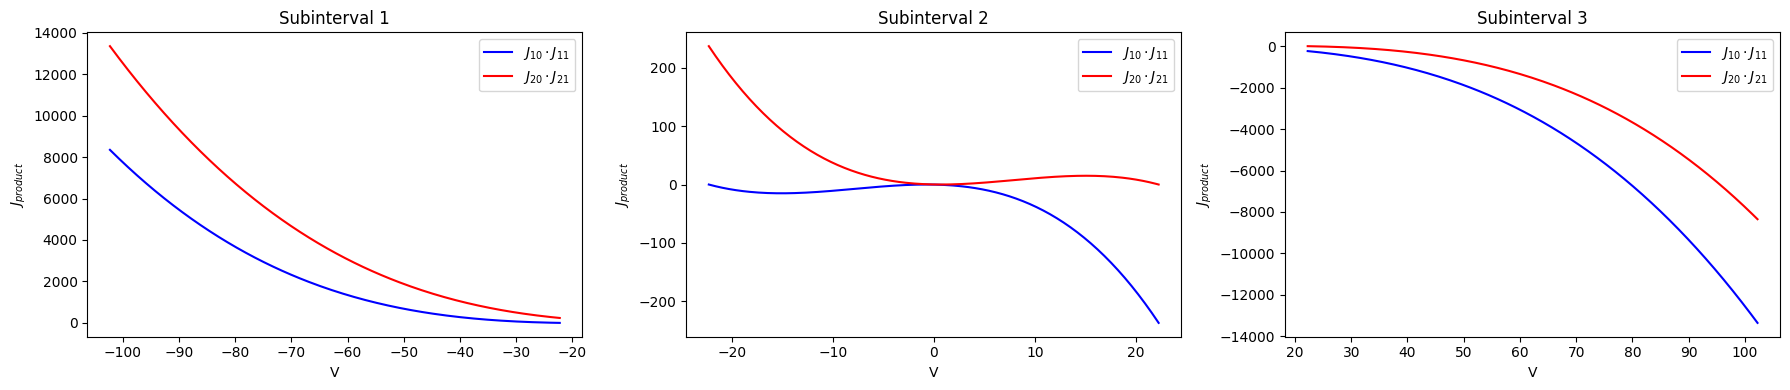

In [6]:
import numpy as np
import matplotlib.pyplot as plt

L = 2
R = 1

# Define V range
#num = 1e+10
V_range = np.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
#c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)

J1_prd2 = J10 * J11
J2_prd2 = J20 * J21

# Find indices of zero values in J1_prd2 and J2_prd2
#zero_indices1 = np.where(J1_prd2 == 0)[0]
#zero_indices2 = np.where(J2_prd2 == 0)[0]

# Find indices of values very close to zero in J1_prd2 and J2_prd2
epsilon = 1e-3  # Adjust this value as needed
zero_indices1 = np.where(np.isclose(J1_prd2, 0, atol=epsilon))[0]
zero_indices2 = np.where(np.isclose(J2_prd2, 0, atol=epsilon))[0]

# Identify consecutive indices and keep one element per consecutive sequence
def keep_one_per_consecutive(indices):
    result_indices = []
    i = 0
    while i < len(indices):
        j = i + 1
        while j < len(indices) and indices[j] == indices[j - 1] + 1:
            j += 1
        result_indices.append(indices[i + (j - i) // 2])
        i = j
    return np.array(result_indices)

# Keep one element per consecutive sequence in zero_indices1 and zero_indices2
zero_indices1 = keep_one_per_consecutive(zero_indices1)
zero_indices2 = keep_one_per_consecutive(zero_indices2)


# Get corresponding values of t for zero values in J1_prd2 and J2_prd2
V_zero_values1 = V_range[zero_indices1]
V_zero_values2 = V_range[zero_indices2]

# Combine the zero values
V_combined = np.concatenate([V_zero_values1, V_zero_values2])

# Rearrange to have V_zero
V_zero = np.sort(V_combined)

# Find the length of V_zero
lng = len(V_zero)

# Create subintervals
#subintervals = np.split(V_zero, np.arange(1, lng))

# Create subintervals using np.linspace
if len(V_zero) > 0:
  subintervals = [
                 np.linspace(V_zero[0]-80, V_zero[0], 200)
               ] + [
                 np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
               ] + [
                 np.linspace(V_zero[-1], V_zero[-1]+80, 200)
               ]
else:
    subintervals = [V_range[0], V_range[-1]]

# Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
midpoints = [np.mean(interval) for interval in subintervals]
signs_J1_prd2 = np.sign(J10 * J11)
signs_J2_prd2 = np.sign(J20 * J21)

# Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
new_V_zero = [V_zero[0]]
for i in range(1, len(V_zero) - 1):
    idx = np.searchsorted(midpoints, V_zero[i])
    if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
        new_V_zero.append(V_zero[i])
new_V_zero.append(V_zero[-1])

# Update V_zero
V_zero = np.array(new_V_zero)

# Update the length of V_zero
lng = len(V_zero)

# Create new subintervals using np.linspace
if len(V_zero) > 0:
  subintervals = [
                 np.linspace(V_zero[0]-80, V_zero[0], 200)
               ] + [
                 np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
               ] + [
                 np.linspace(V_zero[-1], V_zero[-1]+80, 200)
               ]
else:
    subintervals = [V_range[0], V_range[-1]]


# Plot J1_prd2 and J2_prd2 on subintervals
fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))


for i, interval in enumerate(subintervals):
    start_point = interval[0]
    end_point = interval[-1]
    interval_range = np.linspace(start_point, end_point, 200)
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

    J1_prd22 = J10 * J11
    J2_prd22 = J20 * J21

    axs[i].plot(interval_range, J1_prd22, color='blue', label=f'$J_{{10}} \cdot J_{{11}} $')
    axs[i].plot(interval_range, J2_prd22, color='red', label=f'$J_{{20}} \cdot J_{{21}} $')
    axs[i].set_title(f'Subinterval {i + 1}')
    axs[i].set_xlabel('V')
    axs[i].set_ylabel('$J_{product}$')
    axs[i].legend()



# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

<ipython-input-7-04f47fcd3efb>:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))


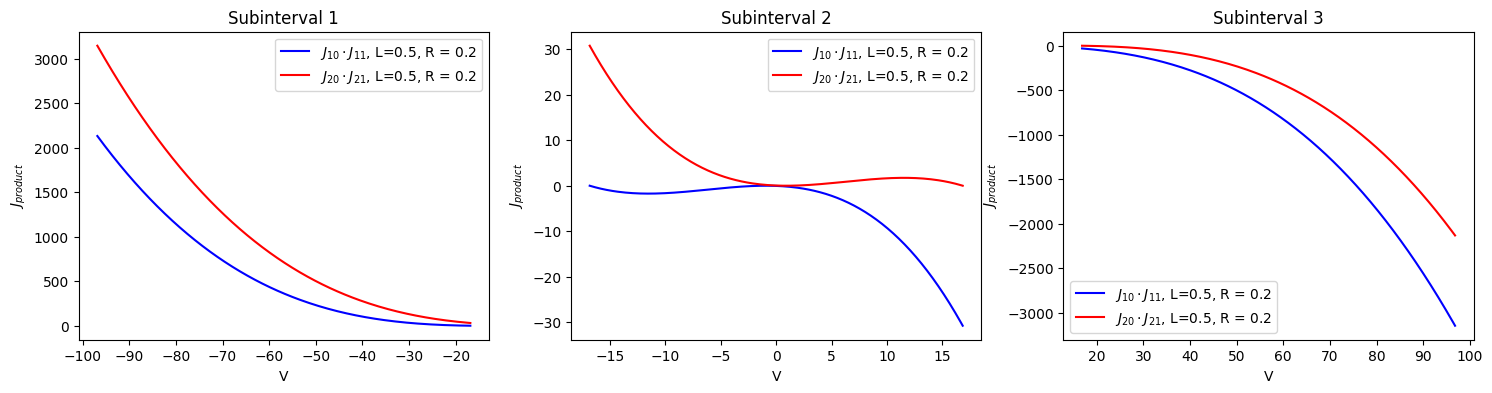

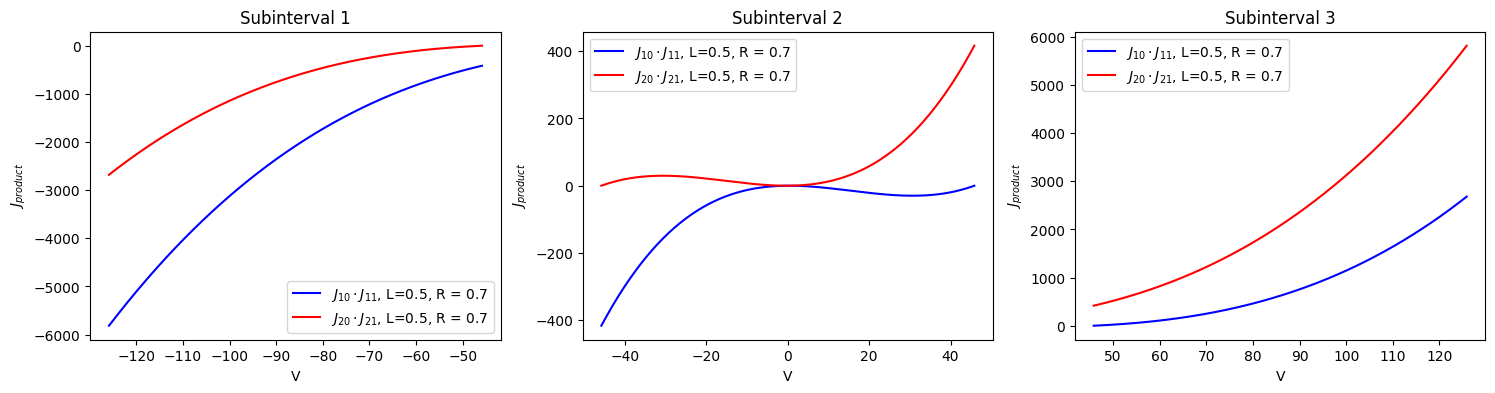

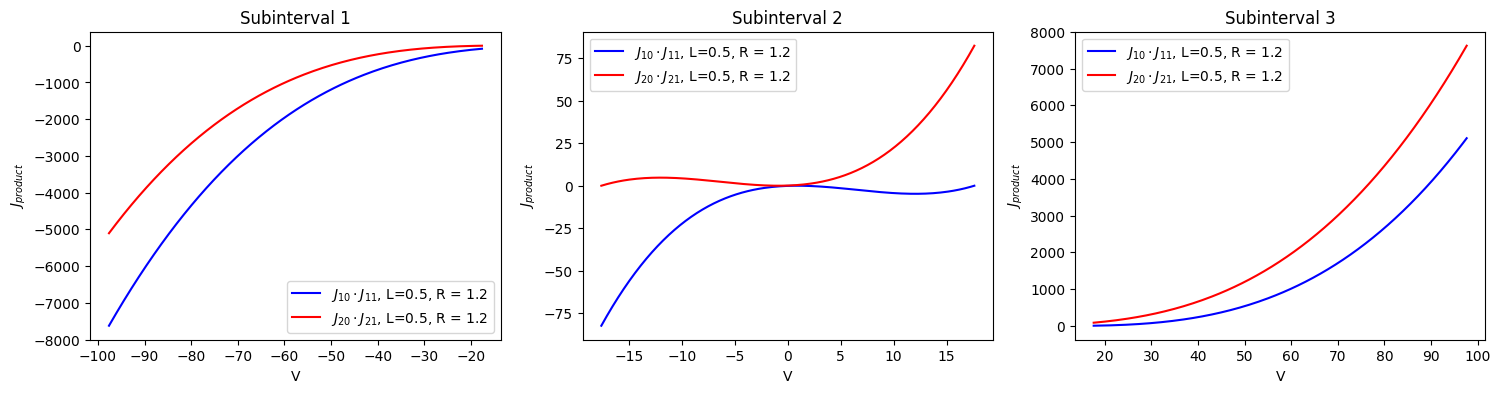

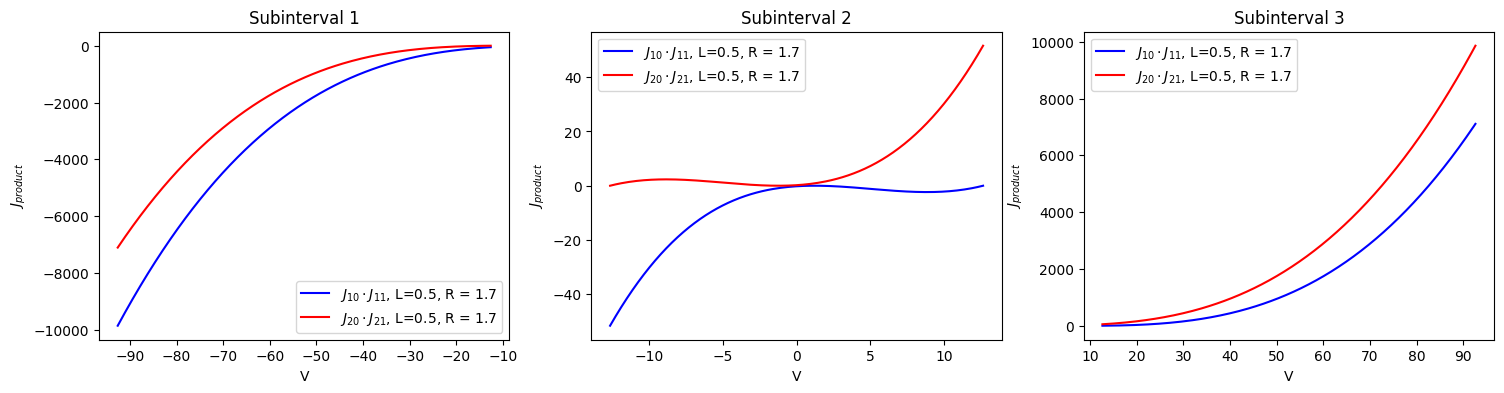

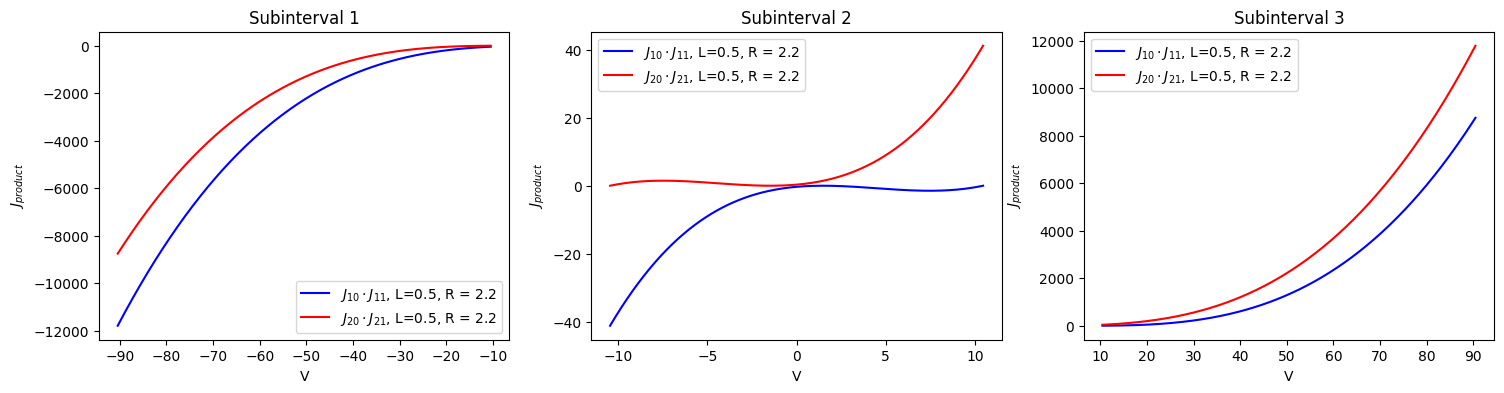

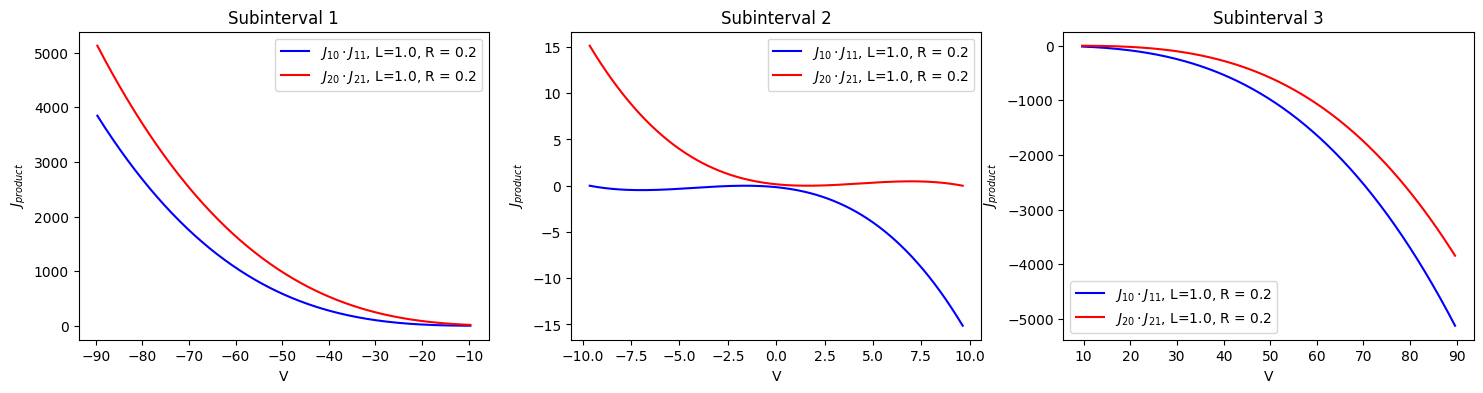

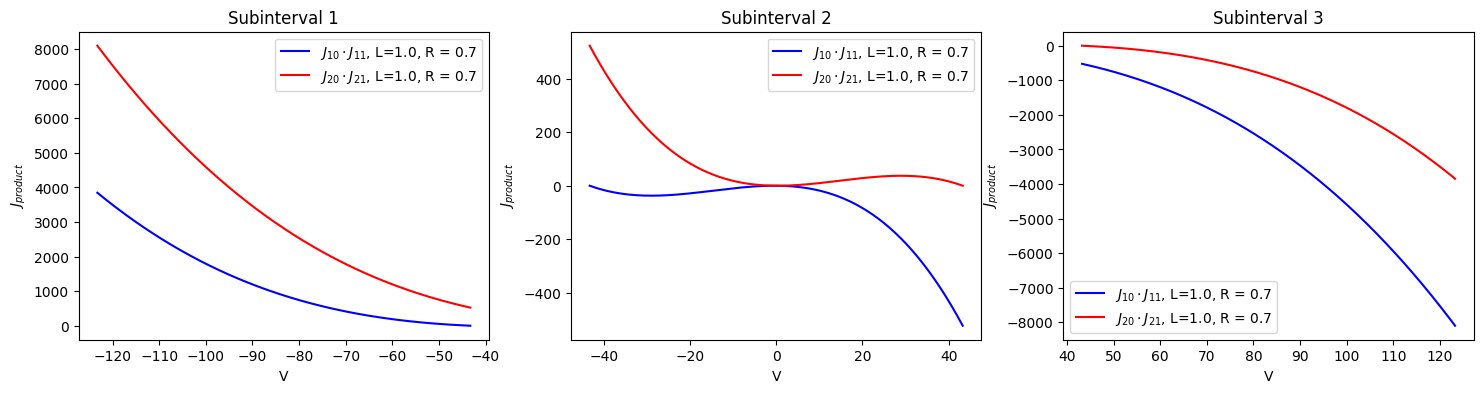

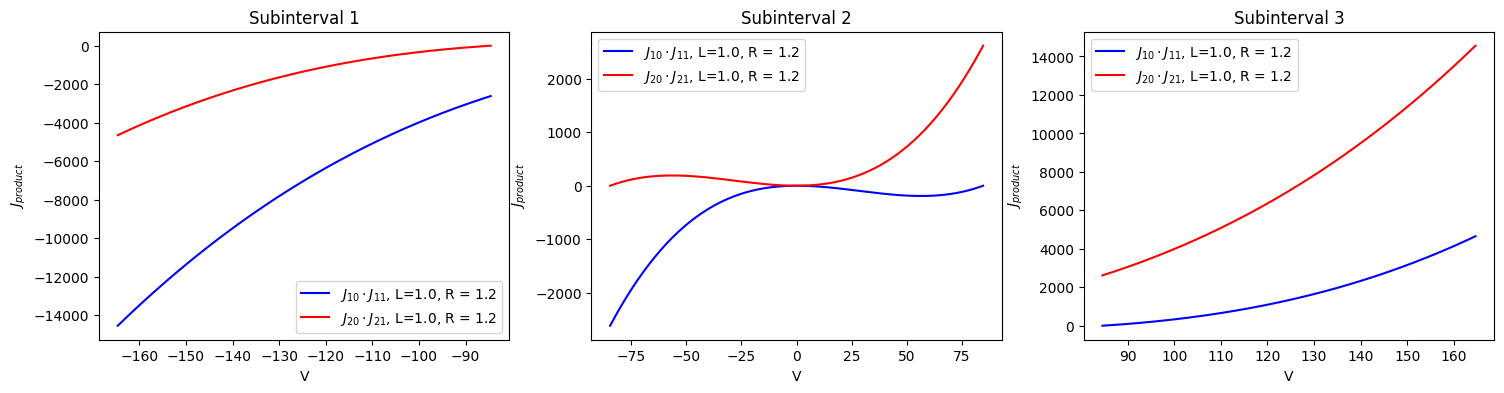

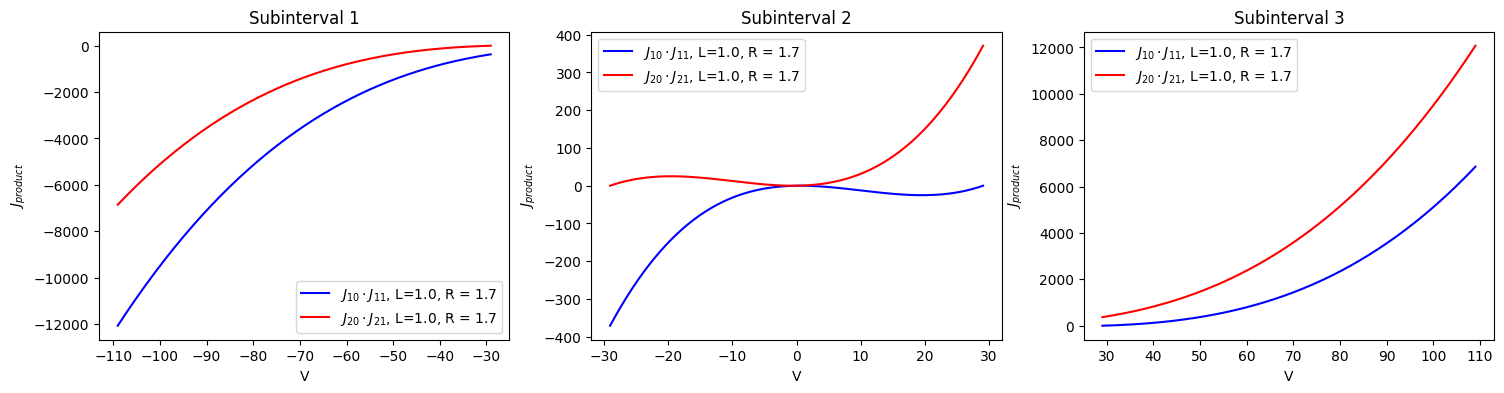

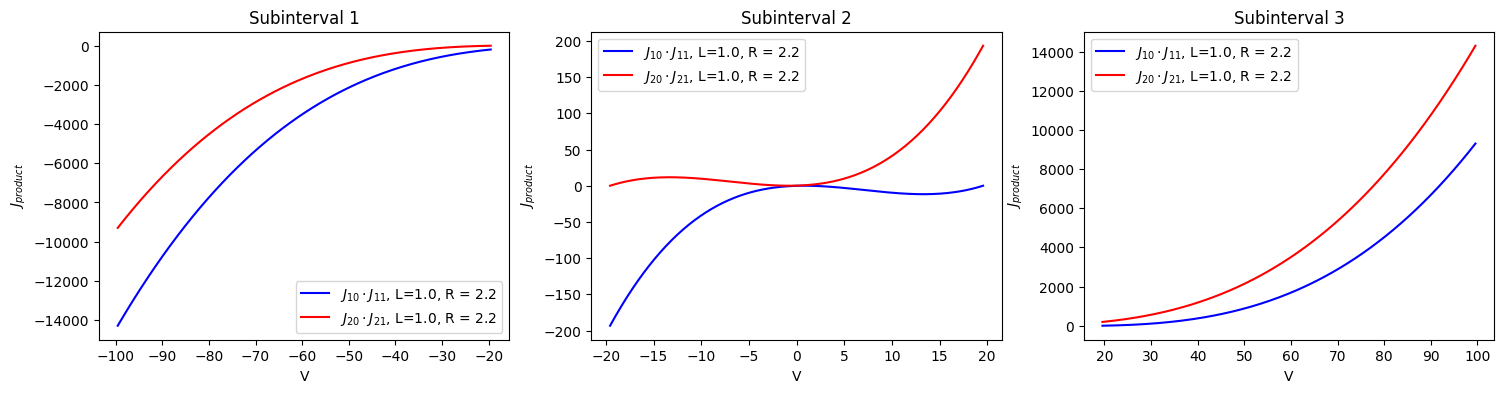

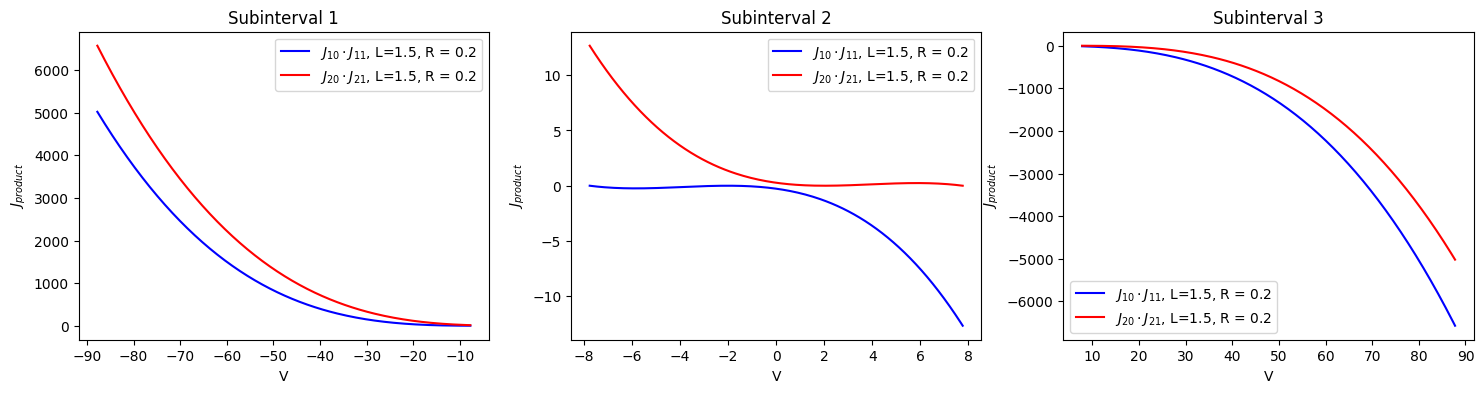

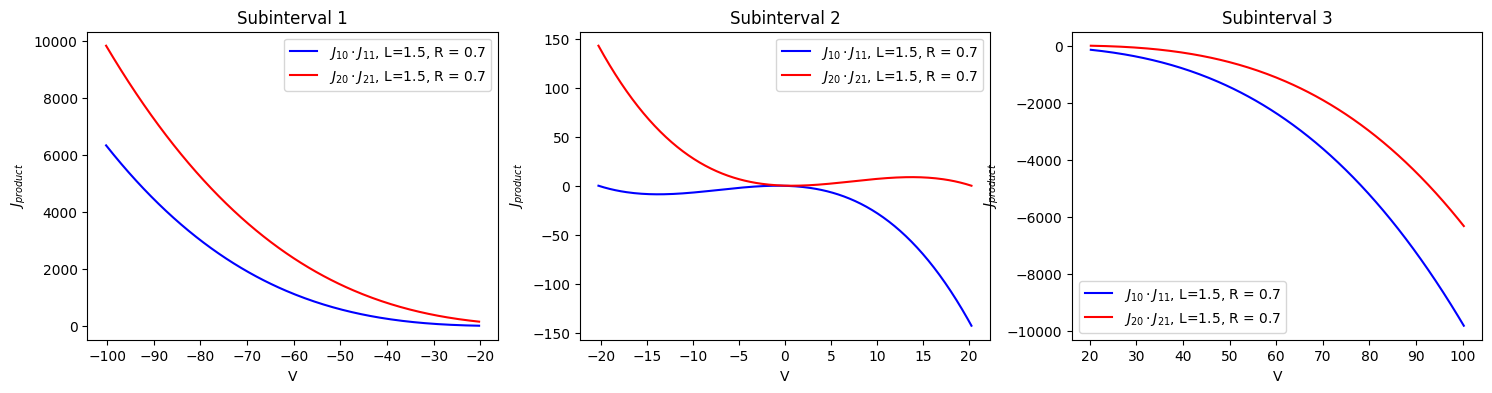

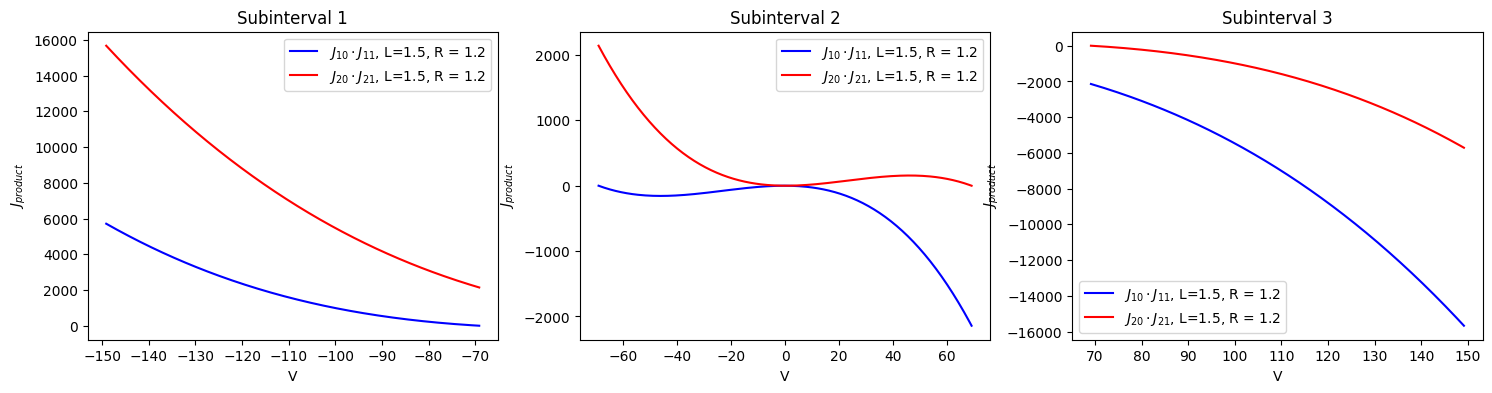

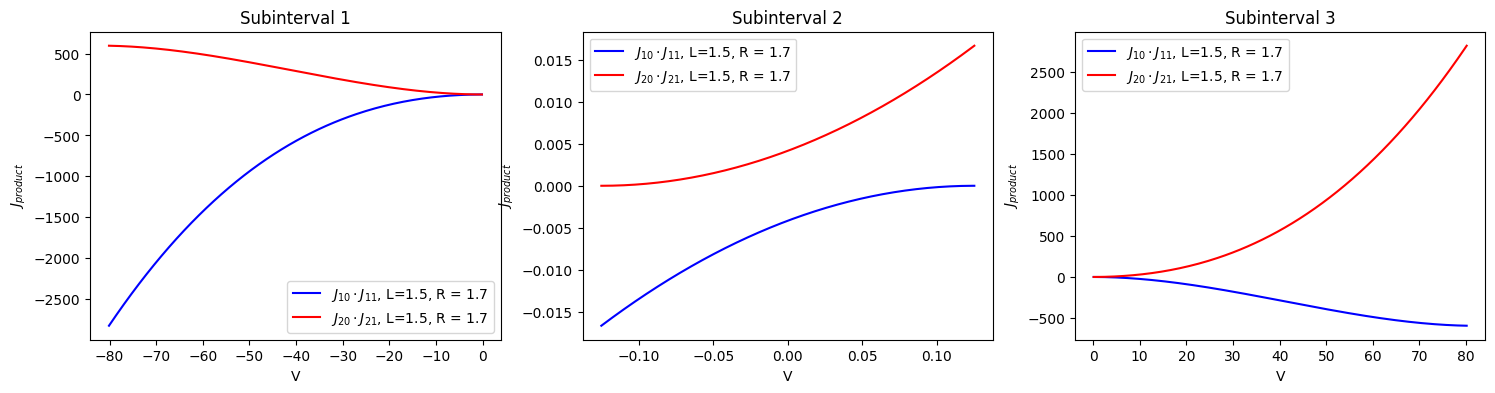

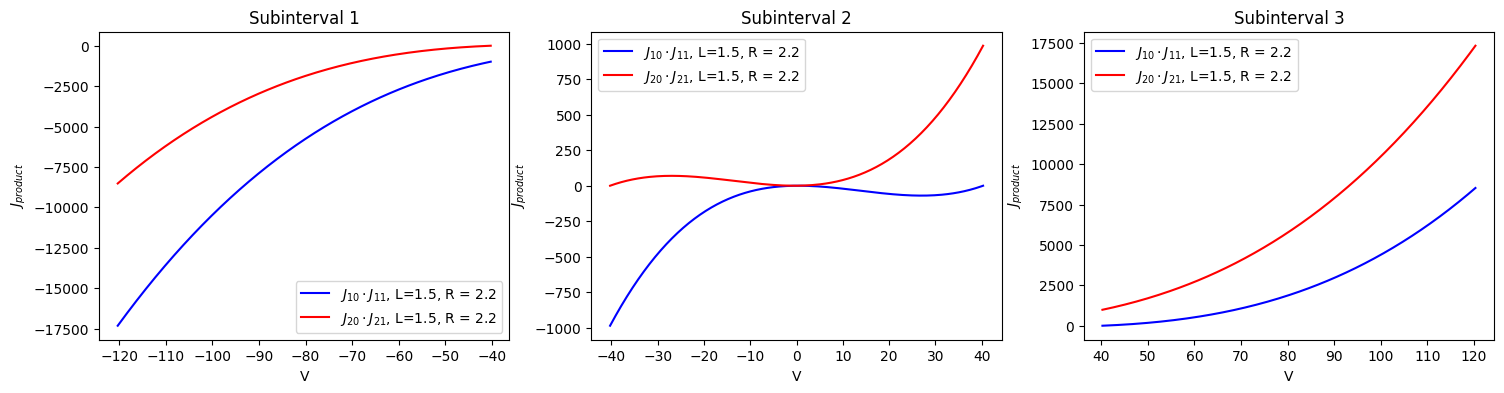

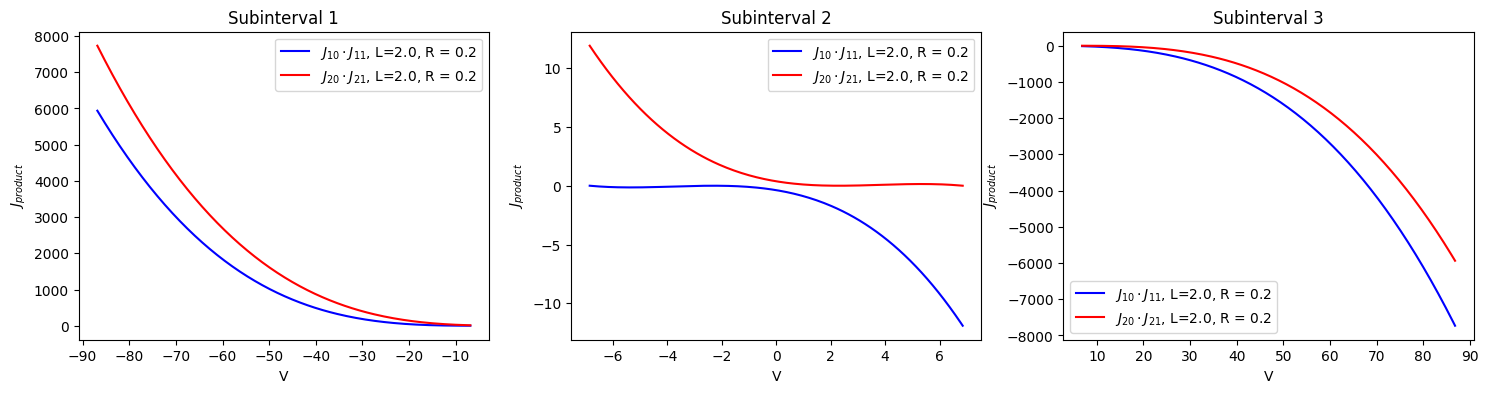

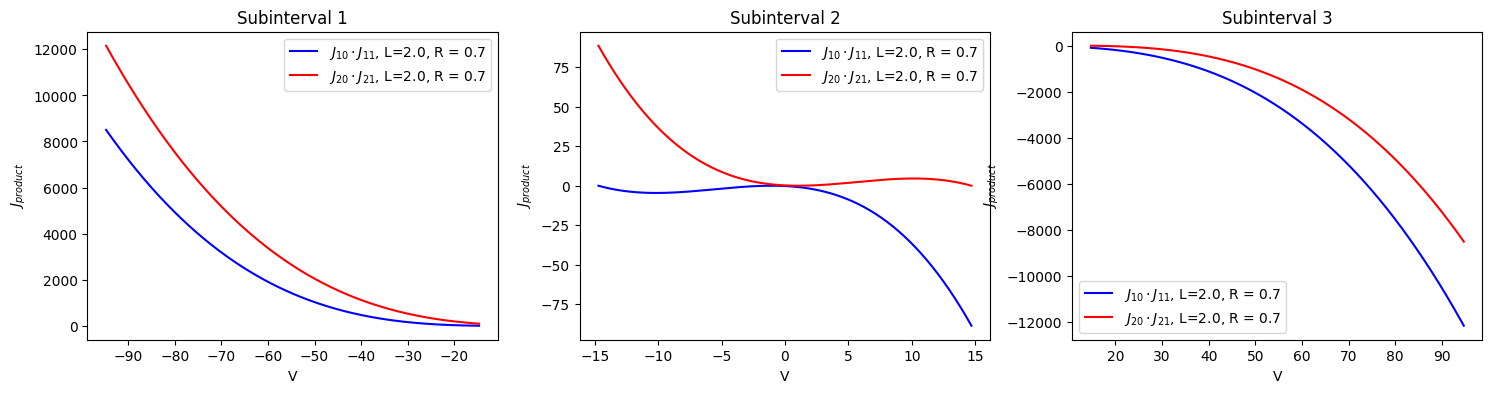

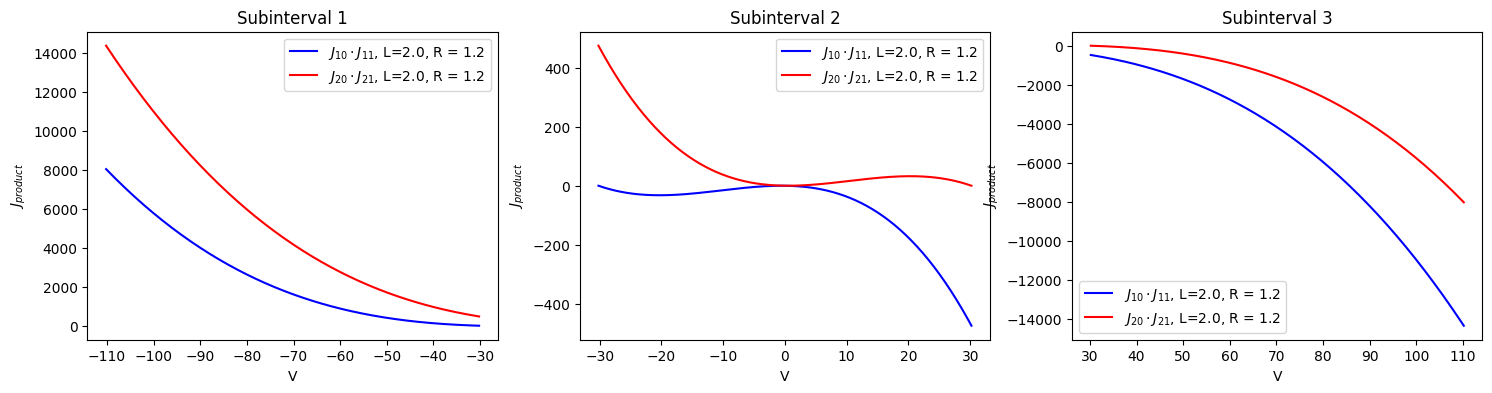

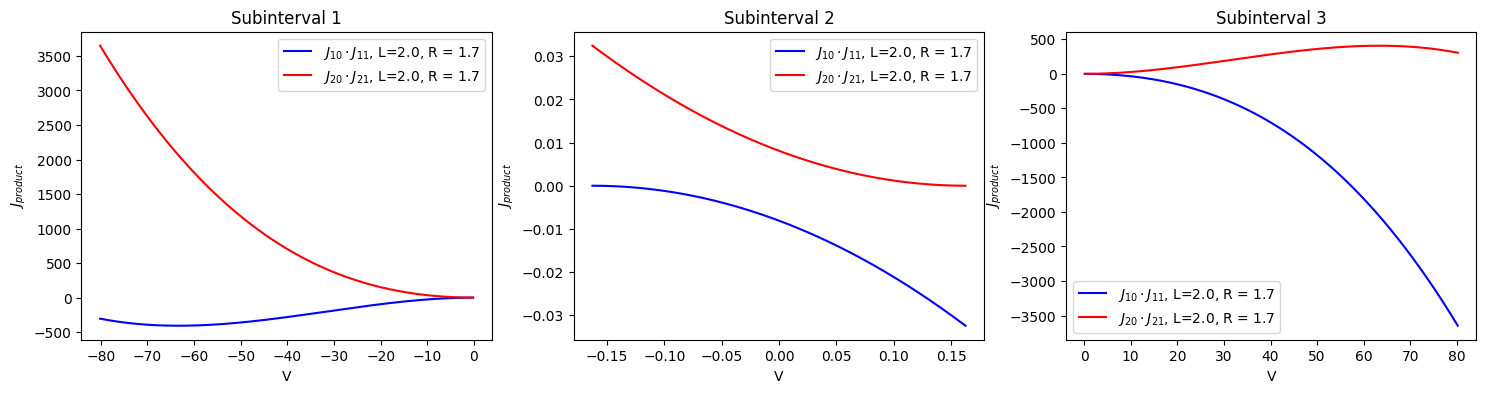

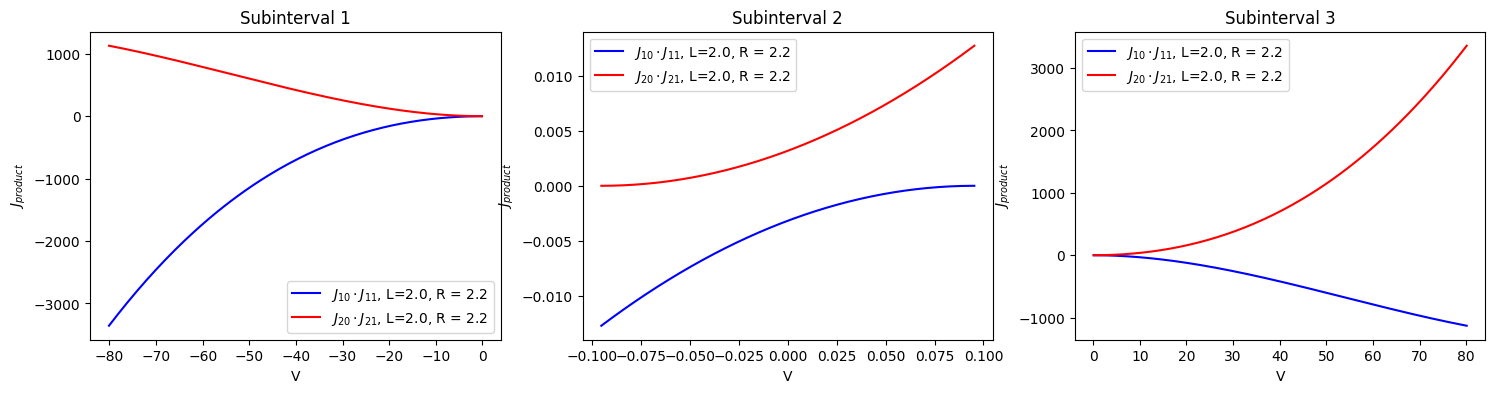

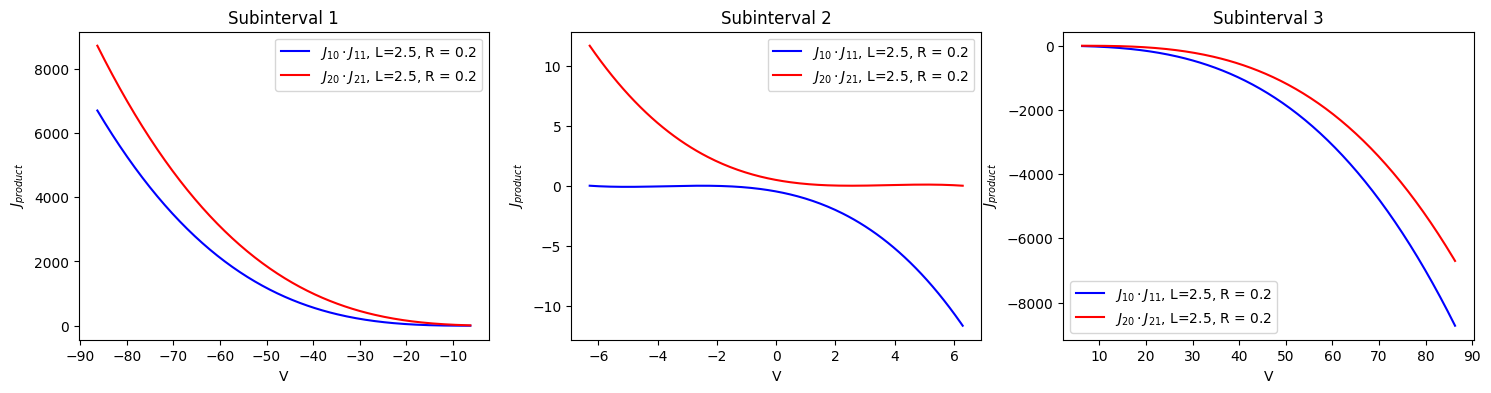

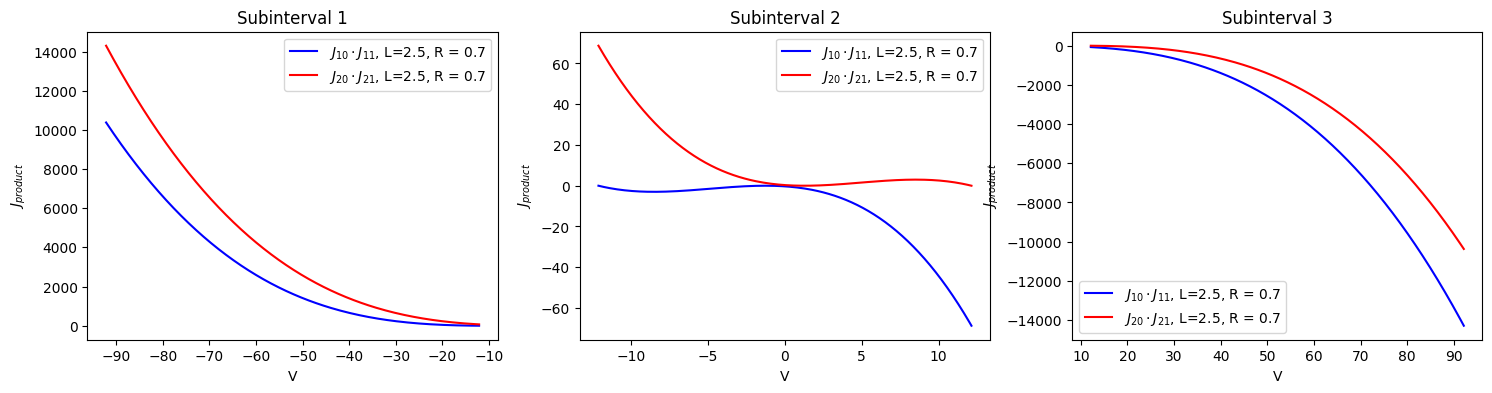

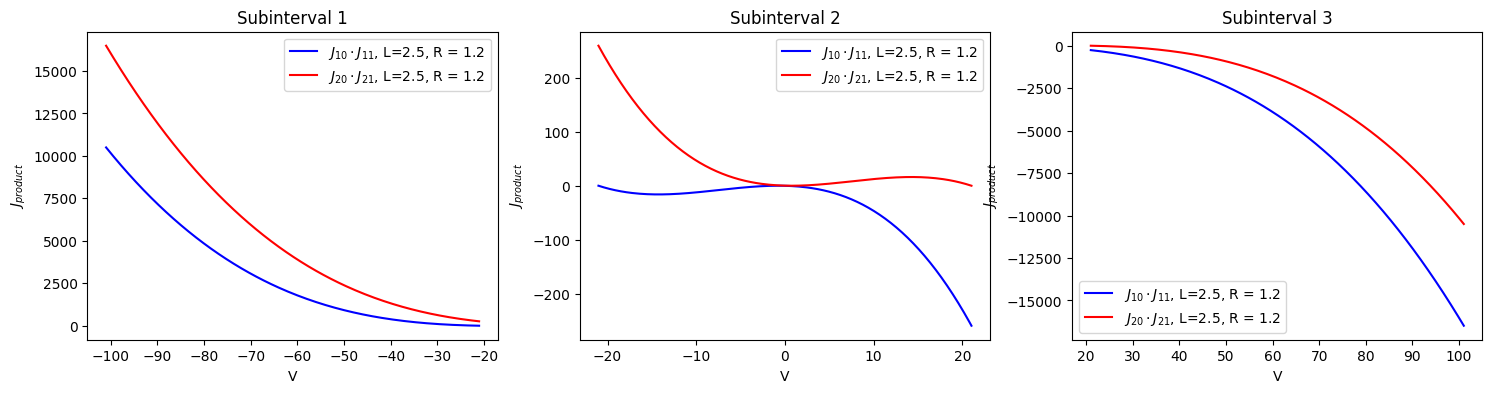

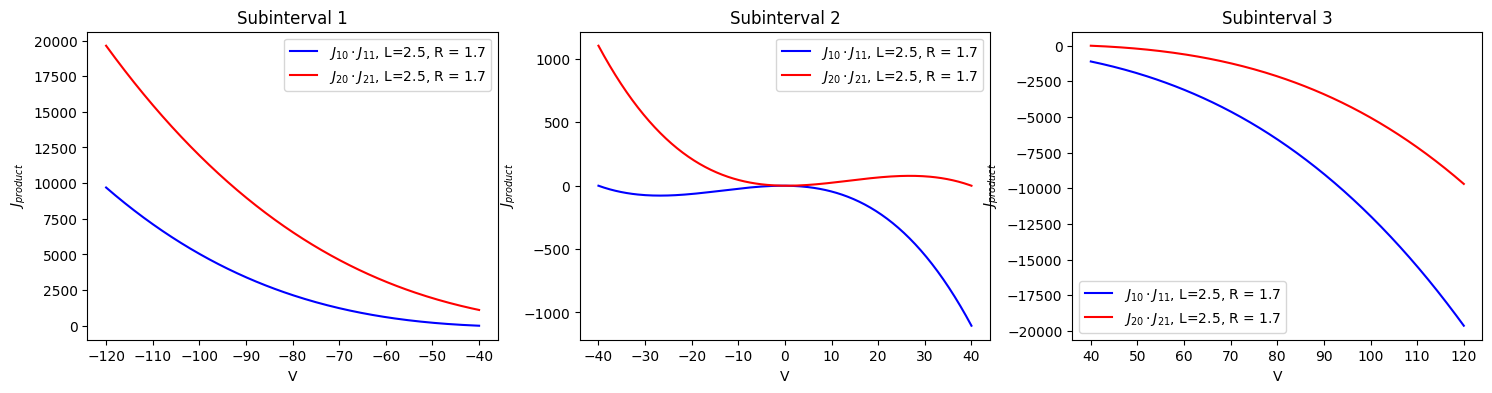

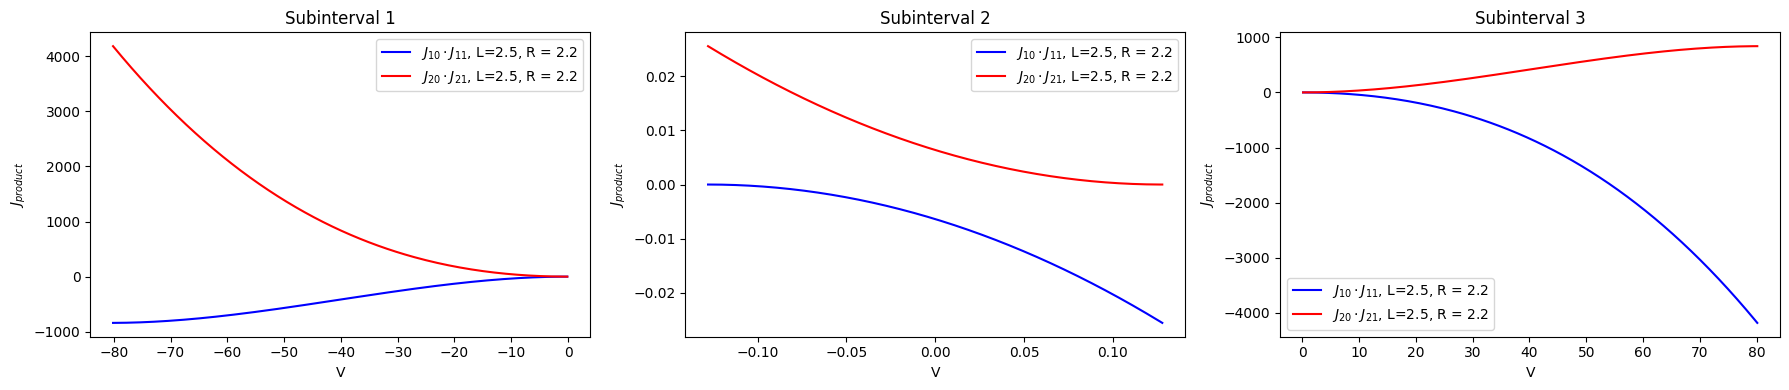

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for L and R
L_values = np.linspace(0.5, 2.5, 5)
R_values = np.linspace(0.2, 2.2, 5)

for i, L in enumerate(L_values):
    for j, R in enumerate(R_values):
        V_range = np.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
        alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)

        J1_prd2 = J10 * J11
        J2_prd2 = J20 * J21

        # Find indices of zero values in J1_prd2 and J2_prd2
        #zero_indices1 = np.where(J1_prd2 == 0)[0]
        #zero_indices2 = np.where(J2_prd2 == 0)[0]

        # Find indices of values very close to zero in J1_prd2 and J2_prd2
        epsilon = 1e-3  # Adjust this value as needed
        zero_indices1 = np.where(np.isclose(J1_prd2, 0, atol=epsilon))[0]
        zero_indices2 = np.where(np.isclose(J2_prd2, 0, atol=epsilon))[0]

        # Identify consecutive indices and keep one element per consecutive sequence
        def keep_one_per_consecutive(indices):
            result_indices = []
            i = 0
            while i < len(indices):
                j = i + 1
                while j < len(indices) and indices[j] == indices[j - 1] + 1:
                    j += 1
                result_indices.append(indices[i + (j - i) // 2])
                i = j
            return np.array(result_indices)

        # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
        zero_indices1 = keep_one_per_consecutive(zero_indices1)
        zero_indices2 = keep_one_per_consecutive(zero_indices2)


        # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
        V_zero_values1 = V_range[zero_indices1]
        V_zero_values2 = V_range[zero_indices2]

        # Combine the zero values
        V_combined = np.concatenate([V_zero_values1, V_zero_values2])

        # Rearrange to have V_zero
        V_zero = np.sort(V_combined)

        # Find the length of V_zero
        lng = len(V_zero)

        # Create subintervals
        #subintervals = np.split(V_zero, np.arange(1, lng))

        # Create subintervals using np.linspace

        if len(V_zero) > 0:
          subintervals = [
                        np.linspace(V_zero[0]-80, V_zero[0], 200)
                      ] + [
                        np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
                      ] + [
                        np.linspace(V_zero[-1], V_zero[-1]+80, 200)
                      ]
        else:
            subintervals = [V_range[0], V_range[-1]]

        # Check the signs of J1_prd2 and J2_prd2 at the midpoints of subintervals
        midpoints = [np.mean(interval) for interval in subintervals]
        signs_J1_prd2 = np.sign(J10 * J11)
        signs_J2_prd2 = np.sign(J20 * J21)

        # Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
        new_V_zero = [V_zero[0]]
        for s in range(1, len(V_zero) - 1):
            idx = np.searchsorted(midpoints, V_zero[s])
            if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
                new_V_zero.append(V_zero[s])
        new_V_zero.append(V_zero[-1])

        # Update V_zero
        V_zero = np.array(new_V_zero)

        # Update the length of V_zero
        lng = len(V_zero)

        # Create new subintervals using np.linspace
        if len(V_zero) > 0:
          subintervals = [
                        np.linspace(V_zero[0]-80, V_zero[0], 200)
                      ] + [
                        np.linspace(V_zero[i], V_zero[i + 1], 200) for i in range(lng - 1)
                      ] + [
                        np.linspace(V_zero[-1], V_zero[-1]+80, 200)
                      ]
        else:
            subintervals = [V_range[0], V_range[-1]]


        # Plot J1_prd2 and J2_prd2 on subintervals
        fig, axs = plt.subplots(1, lng + 1, figsize=(18, 4))


        # Plot J1_prd2 and J2_prd2 on subintervals
        for k, interval in enumerate(subintervals):
            start_point = interval[0]
            end_point = interval[-1]
            interval_range = np.linspace(start_point, end_point, 200)
            c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
            c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

            J1_prd22 = J10 * J11
            J2_prd22 = J20 * J21

            axs[k].plot(interval_range, J1_prd22, color='blue', label=f'$J_{{10}} \cdot J_{{11}} $, L={L}, R = {R}')
            axs[k].plot(interval_range, J2_prd22, color='red', label=f'$J_{{20}} \cdot J_{{21}} $, L={L}, R = {R}')
            axs[k].set_title(f'Subinterval {k + 1}')
            axs[k].set_xlabel('V')
            axs[k].set_ylabel('$J_{product}$')
            axs[k].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [8]:
print(zero_indices1)
print(zero_indices2)
print(np.ndim(J1_prd22))
int(-4.4)


[4998721]
[5001278]
1


-4

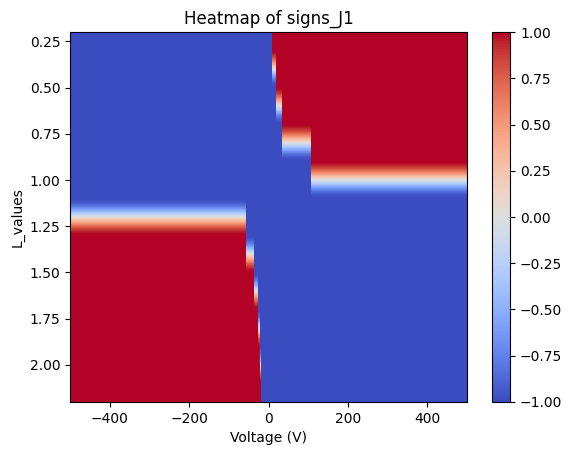

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for L and R
L_values = np.linspace(0.2, 2.2, 10)
R = 1

# Initialize matrices for signs_J1 and signs_J2
lenL = len(L_values)
num_subintervals = 200

signs_J1 = np.zeros((lenL, num_subintervals))
signs_J2 = np.zeros((lenL, num_subintervals))
V_critic = np.zeros((lenL, num_subintervals))

for i, L in enumerate(L_values):
  V_range = np.linspace(-500, 500, int(1e7))  # Adjust the number of points as needed
  alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


  c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
  c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
  J1_prd2 = J10 * J11
  J2_prd2 = J20 * J21

  # Find indices of values very close to zero in J1_prd2 and J2_prd2
  epsilon = 1e-3  # Adjust this value as needed
  zero_indices1 = np.where(np.isclose(J1_prd2, 0, atol=epsilon))[0]
  zero_indices2 = np.where(np.isclose(J2_prd2, 0, atol=epsilon))[0]

  # Identify consecutive indices and keep one element per consecutive sequence
  def keep_one_per_consecutive(indices):
      result_indices = []
      i = 0
      while i < len(indices):
          j = i + 1
          while j < len(indices) and indices[j] == indices[j - 1] + 1:
              j += 1
          result_indices.append(indices[i + (j - i) // 2])
          i = j
      return np.array(result_indices)

  # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
  zero_indices1 = keep_one_per_consecutive(zero_indices1)
  zero_indices2 = keep_one_per_consecutive(zero_indices2)


  # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
  V_zero_values1 = V_range[zero_indices1]
  V_zero_values2 = V_range[zero_indices2]

  # Combine the zero values
  V_combined = np.concatenate([V_zero_values1, V_zero_values2])

  # Rearrange to have V_zero
  V_zero = np.sort(V_combined)

  # Find the length of V_zero
  lng = len(V_zero)

  # Create subintervals
  if len(V_zero) > 0:
    subintervals = [
                  np.linspace(V_zero[0]-80, V_zero[0], num_subintervals)
                ] + [
                  np.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
                ] + [
                  np.linspace(V_zero[-1], V_zero[-1]+80, num_subintervals)
                ]
  else:
      subintervals = [V_range[0], V_range[-1]]


  # Check and remove points where both J1_prd2 and J2_prd2 have the same sign across consecutive subintervals
  new_V_zero = [V_zero[0]]
  for s in range(1, len(V_zero) - 1):
      idx = np.searchsorted(midpoints, V_zero[s])
      if signs_J1_prd2[idx] != signs_J1_prd2[idx - 1] or signs_J2_prd2[idx] != signs_J2_prd2[idx - 1]:
          new_V_zero.append(V_zero[s])
  new_V_zero.append(V_zero[-1])

  # Update V_zero
  V_zero = np.array(new_V_zero)

  # Update the length of V_zero
  lng = len(V_zero)

  # Create new subintervals using np.linspace
  if len(V_zero) > 0:
    subintervals = [
                  np.linspace(V_zero[0]-80, V_zero[0], num_subintervals)
                ] + [
                  np.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
                ] + [
                  np.linspace(V_zero[-1], V_zero[-1]+80, num_subintervals)
                ]
  else:
      subintervals = [V_range[0], V_range[-1]]


  signs_J1_temp = np.zeros(num_subintervals)
  signs_J2_temp = np.zeros(num_subintervals)

  for k, interval in enumerate(subintervals):
      start_point = interval[0]
      end_point = interval[-1]
      interval_range = np.linspace(start_point, end_point, num_subintervals)
      c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
      c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)

      J1_prd22 = J10 * J11
      J2_prd22 = J20 * J21

      midpoint = (start_point + end_point) / 2
      # Find the index in interval_range closest to the midpoint
      mid_index = np.abs(interval_range - midpoint).argmin()

      #mid_value = interval_range[midpoint_index]

      # Append the signs for the current L
      sign_J1_prd22 = np.sign(J1_prd22[mid_index])
      sign_J2_prd22 = np.sign(J2_prd22[mid_index])


      # Append the signs for the current L to the temporary arrays
      signs_J1_temp[k] = 1 if sign_J1_prd22 > 0 else -1
      signs_J2_temp[k] = 1 if sign_J2_prd22 > 0 else -1

  # Assign the temporary arrays to the i-th row of signs_J1 and signs_J2
  signs_J1[i, :] = signs_J1_temp
  signs_J2[i, :] = signs_J2_temp
  V_critic[i, :lng] = V_zero


# Create a matrix to store the heatmap values
Jsign_func = np.zeros((lenL, len(V_range)))


for i in range(len(V_critic)):
    left_index = np.searchsorted(V_range,V_critic[i, 0])
    Jsign_func[i, :left_index] = signs_J1[i, 0]
    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j+1] == 0) :
            break
        # Find the indices corresponding to the current segment
        start_index = np.searchsorted(V_range, V_critic[i, j])
        end_index = np.searchsorted(V_range, V_critic[i, j + 1])

        # Assign values from S to the corresponding segment in H
        Jsign_func[i, start_index:end_index] = signs_J1[i, j + 1]
        if (V_critic[i, j] != 0 and V_critic[i, j+1] == 0) :
          right_index = np.searchsorted(V_range,V_critic[i, j])
          Jsign_func[i, right_index:] = signs_J1[i, j+1]


#for i in range(len(V_critic)):
  # Find the first nonzero element and its index from the left
#  left_nonzero_index = next((s for s, x in enumerate(Jsign_func[i,:]) if x != 0), None)
#  if left_nonzero_index is not None:
#      Jsign_func[i, :left_nonzero_index] = [Jsign_func[i, left_nonzero_index]] * left_nonzero_index

  # Find the first nonzero element and its index from the right
#  right_nonzero_index = next((s for s, x in enumerate(Jsign_func[i, ::-1]) if x != 0), None)
#  if right_nonzero_index is not None:
#      right_nonzero_index = len(Jsign_func[i,:]) - right_nonzero_index
#      Jsign_func[i, -right_nonzero_index:] = [Jsign_func[i, right_nonzero_index - 1]] * right_nonzero_index


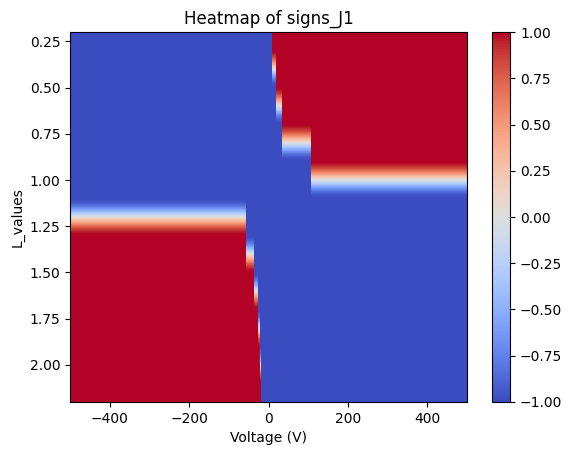

In [40]:
# Plot the heatmap with specified color scale limits
plt.imshow(Jsign_func, cmap='coolwarm', extent=[-500, 500, L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
 # cmap='RdGy', cmap='seismic', cmap='bwr'
plt.xlabel('Voltage (V)')
plt.ylabel('L_values')
plt.title('Heatmap of signs_J1')
plt.colorbar()
plt.show()


In [10]:
print(signs_J1)
print(V_critic)

[[-1. -1.  1. ...  0.  0.  0.]
 [-1. -1.  1. ...  0.  0.  0.]
 [-1. -1.  1. ...  0.  0.  0.]
 ...
 [ 1. -1. -1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]
 [ 1. -1. -1. ...  0.  0.  0.]]
[[ -9.64085096   9.64095096   0.         ...   0.           0.
    0.        ]
 [-17.89695179  17.89705179   0.         ...   0.           0.
    0.        ]
 [-35.11195351  35.11205351   0.         ...   0.           0.
    0.        ]
 ...
 [-27.41175274  27.41175274   0.         ...   0.           0.
    0.        ]
 [-22.62195226  22.62205226   0.         ...   0.           0.
    0.        ]
 [-19.56895196  19.56895196   0.         ...   0.           0.
    0.        ]]


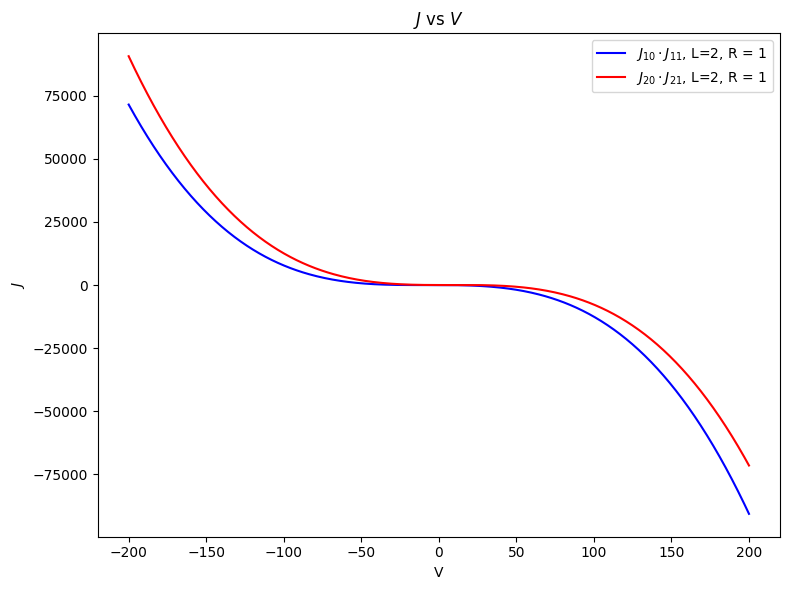

In [22]:
# Define the parameters
L=2
R=1
# Define V range
V_range = np.linspace(-200, 200, 400)  # Adjust the number of points as needed

# Calculate zeroth, first, and second order terms for the entire V_range
c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)

J1_prd2 = J10 * J11
J2_prd2 = J20 * J21
# Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
#magnitude1 = np.linalg.norm(J1_prd2)
#magnitude2 = np.linalg.norm(J2_prd2)


# Normalize
#normalized_J1_prd2 = J1_prd2 / max_abs_value1
#normalized_J2_prd2 = J2_prd2 / max_abs_value2

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot J1_product and J2_product on the same figure
ax.plot(V_range, J1_prd2, color='blue', label=f'$J_{{10}} \cdot J_{{11}}$, L={L}, R = {R}')
ax.plot(V_range, J2_prd2, color='red', label=f'$J_{{20}} \cdot J_{{21}}$, L={L}, R = {R}')
ax.set_xlabel('V')
ax.set_ylabel('$J$')

# Create a title and legend
title = '$J$ vs $V$'
ax.set_title(title)
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()


In [23]:
#print(J10)
#print(J11)
#print(J10*J11)
#print(normalized_J1_prd2)
#print(A)
#print(B)

In [24]:
 # Define the second order terms

 def second_order_terms(V, alpha, beta, L, R, z1, z2):
     # Constants
     c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
     c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
     H1 = 1.0
     phiL = V
     phiR = 0.0
     c1L  = L / z1
     c1R  = R / z1
     T0   = J10 +  J20
     T1   = J11 +  J21
     I1   = z1*J11 + z2*J21

     # Intermediate calculations
     A1 = -z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))
     A2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phiL - phi0a) / (np.log(c1L) - np.log(c10a))
           - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)))
     B2 = (z1 * z2 * (phi0a - phi0b) * (1 / z1 + (phi0b - phiR) / (np.log(c10b) - np.log(c1R))
           - (phi0b - phiR) * (c10b - c1R) / ((np.log(c10b) - np.log(c1R))**2 * c10b)))
     # Constants
     C1L = z1**2 * c11a + z2**2 * c21a
     C1R = z1**2 * c11b + z2**2 * c21b
     C2 = (z1 + z2) * (c10b**2 - c10a**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
     I1_term = I1 * y1

     #Compute C:
     # First term
     C = -(C1L / (2 * z1 * (z1 - z2) * c10a)**2) + (C1R / (2 * (z1 * (z1 - z2) * c10b)**2)) + C2
     # Second term
     term2 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (np.log(L) - np.log(R)) * c10a)
     term2 -= (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - (1 / (z1 - z2))
     # Third term
     term3 = (0.5 * z2 * V / (z1 * (z1 - z2)**2 * (np.log(L) - np.log(R)))) * (1 / c10a**2 - 1 / c10b**2)
     # Fourth term
     term4 = (z1 * z2 * (phi1a - phi1b) * V / (np.log(L) - np.log(R)))
     term4 *= (1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1
     # Fifth term
     term5 = (0.5 * z1**2 * z2**2 * V * (T0 * y1 + T1 * y0)**2 / (np.log(L) - np.log(R)))
     # Sixth term
     term6 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (np.log(L) - np.log(R))))
     term6 *= z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2)
     # Seventh term
     term7 = (J11 * V / (z1 * T0 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Eighth term
     term8 = (J10 * (phi0a - phi0b) * V / (z1 * T0**2 * H1 * (np.log(L) - np.log(R)))) * (1 / c10b - 1 / c10a)
     # Combine all terms
     C += term2 + term3 - term4 - term5 + term6 + term7 + term8

     # Calculate c12a, c22a, c12b, c22b
     c12a = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a)) -
             ((phi0a - phi0b) * alpha * z2) / (z1 - z2))
     c22a = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) +
             ((phi0a - phi0b) * alpha * z1) / (z1 - z2))
     c12b = (-((z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b)) +
             ((phi0a - phi0b) * (1 - beta) * z2) / (z1 - z2))
     c22b = ((4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) -
             ((phi0a - phi0b) * (1 - beta) * z1) / (z1 - z2))

     # Calculate phi2a, phi2b
     phi2a = ((B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
               B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1))
     phi2b = ((1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1)


     y2 = (y0 * (phi1a - phi1b) / (H1 * T0) - (y1 / c10a) * (z2 * alpha * (phi0b - phi0a) / (z1 - z2) -
       (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2)) +
       (0.5 / (z1**2 * (z1 - z2)**2 * T0)) * (1 / c10a**2 - 1 / c10b**2) +
       ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b) -
       (z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2 +
       (((phi0a - phi0b) * y0) / (H1 * T0 * c10a)) * ((z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - 1 / (z1 - z2)) +
       (J11 / (z1**2 * z2 * T0**2)) * (1 / c10b - 1 / c10a) +
       (J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1)) * (1 / c10b - 1 / c10a)
       )




     # Calculate J12:
     J12_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
     J12_term1 *= ((1 / z1) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J12_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J12_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J12_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
     J12_term3 *= (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2)) + z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))

     J12 = J12_term1 - J12_term2 - J12_term3

     # Calculate J22:
     J22_term1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z2 - z1)))
     J22_term1 *= ((1 / z2) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a))

     J22_term2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
     J22_term2 *= (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

     J22_term3 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
     J22_term3 *= (z1 - z2) * phi1a - (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2))+  (z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2)))

     J22 = J22_term1 + J22_term2 + J22_term3






     return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)


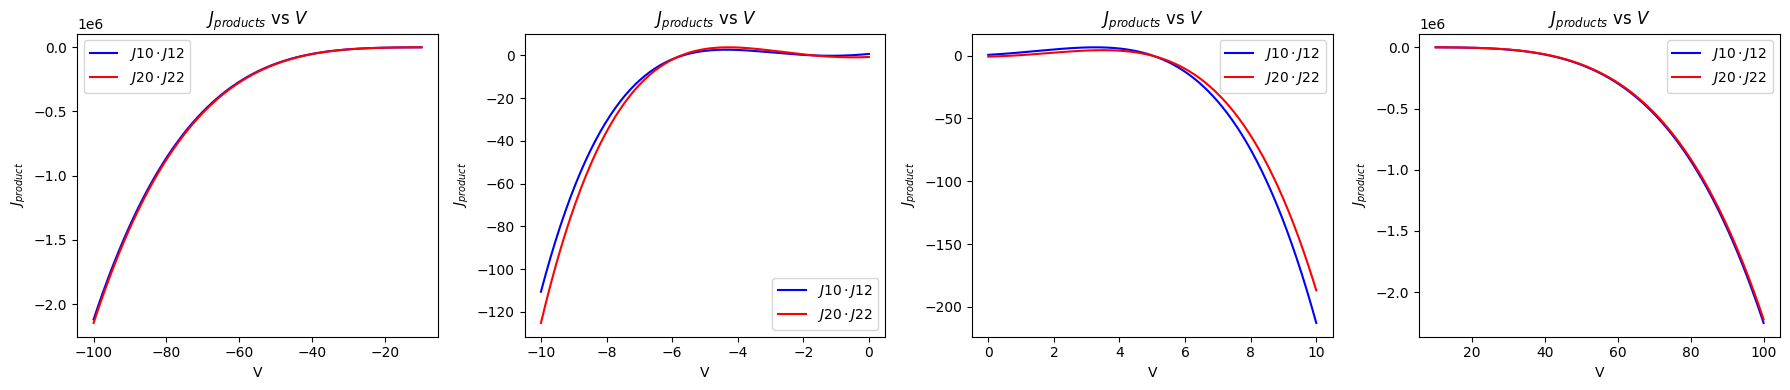

In [25]:
# Define the parameter values

L1 = 1
R1 = 2
alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L1, R1)

V1_range2 = np.linspace(-100, -10, 200)
V2_range2 = np.linspace(-10, 0, 200)
V3_range2 = np.linspace(0, 10, 200)
V4_range2 = np.linspace(10, 100, 200)

V_ranges2 = [V1_range2, V2_range2, V3_range2, V4_range2]

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges2, 1):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    Q = 0.05
    J1_prd2 = J10 * J12
    J2_prd2 = J20 * J22
    # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
    #magnitude1 = np.linalg.norm(J1_prd2)
    #magnitude2 = np.linalg.norm(J2_prd2)

    # Normalize
    #normalized_J1_prd2 = J1_prd2 / magnitude1
    #normalized_J2_prd2 = J2_prd2 / magnitude2


    # Plot on the corresponding subplot
    axs[i-1].plot(V_range, J1_prd2, color='blue', label='$J10\cdot J12$')
    axs[i-1].plot(V_range, J2_prd2, color='red', label='$J20\cdot J22$')
    axs[i-1].set_xlabel('V')
    axs[i-1].set_ylabel('$J_{{product}}$')
    #axs[i-1].set_ylabel('$J$')
    # Create the title dynamically based on the values of Vqmin and Vqmax

    title = f'$J_{{products}}$ vs $V$'


    axs[i-1].set_title(title)
    axs[i-1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

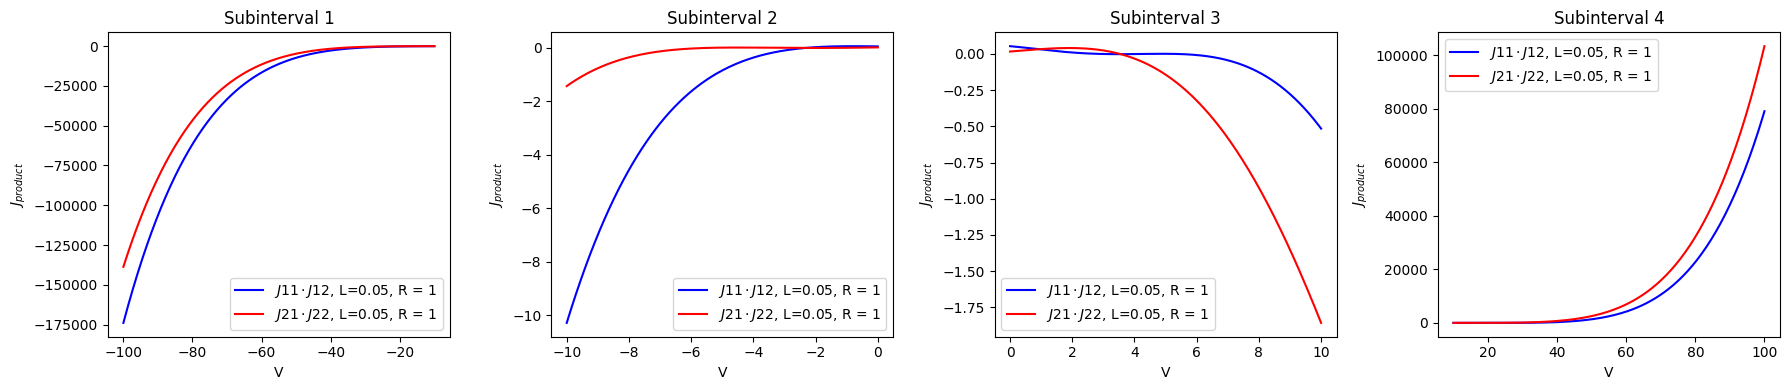

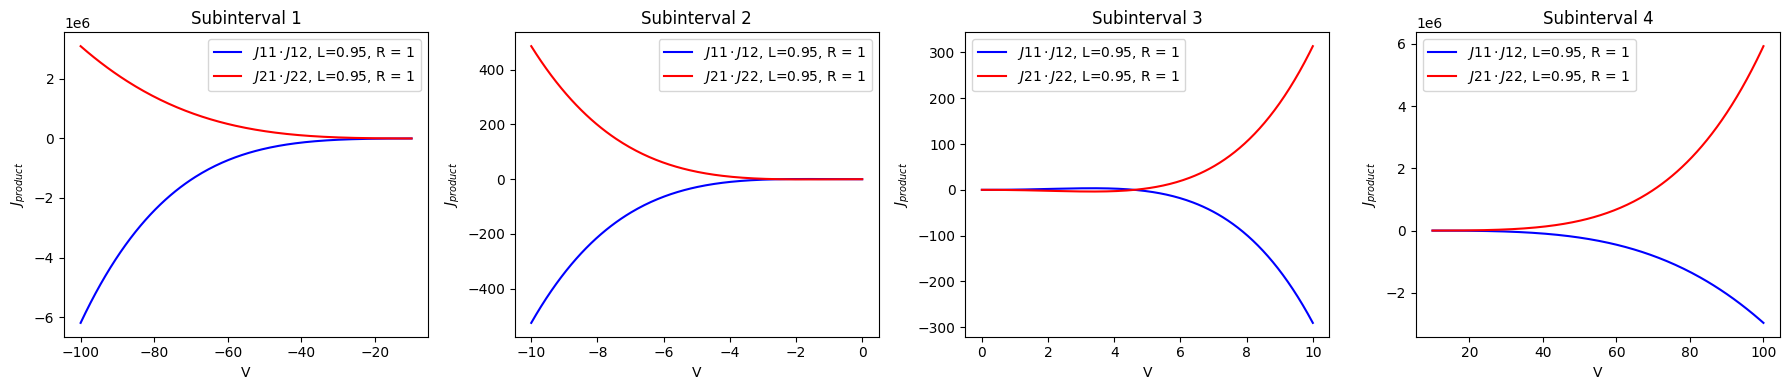

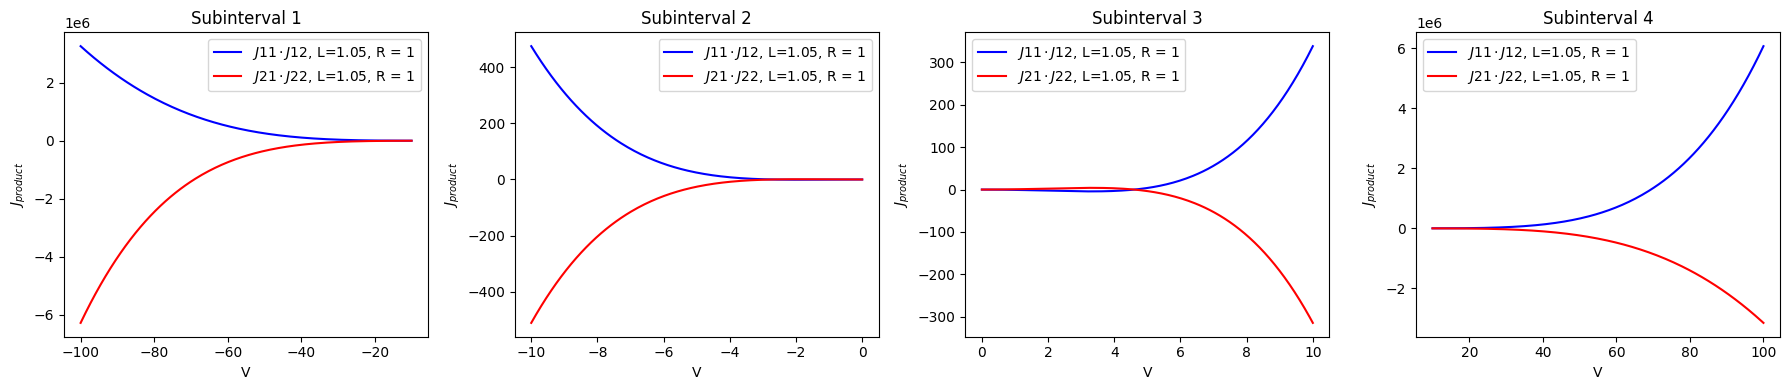

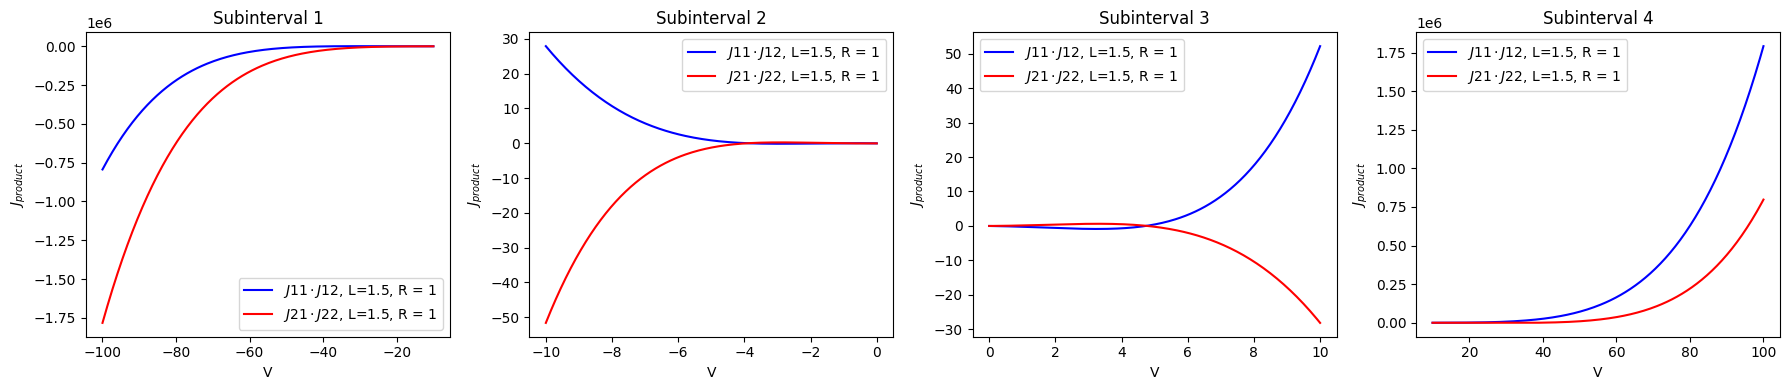

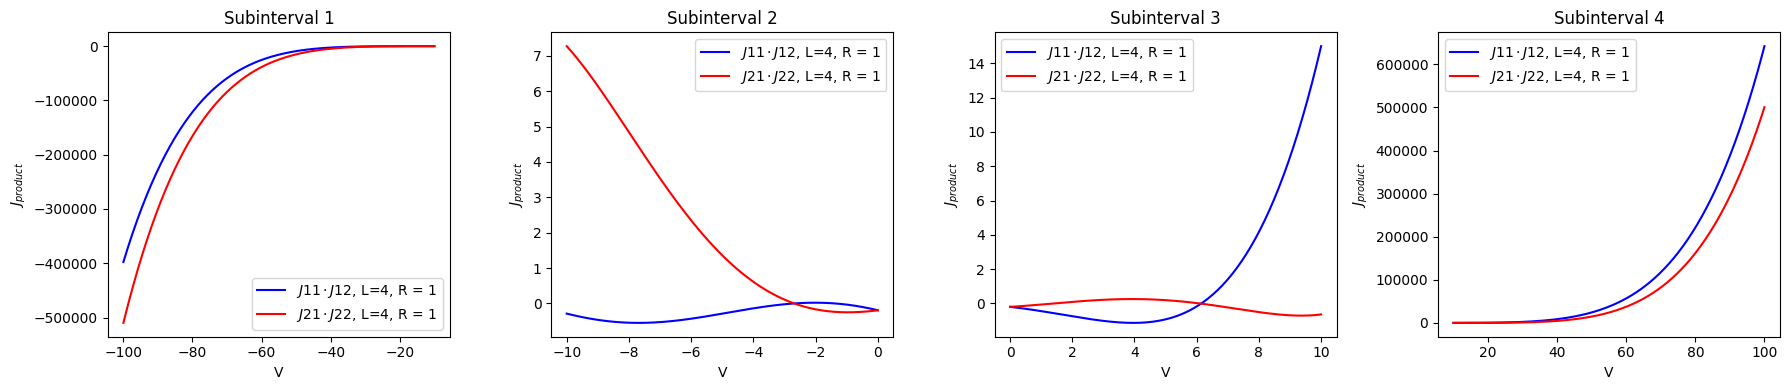

In [26]:
# Define the parameter values


R = 1

for L in [0.05,  0.95, 1.05,  1.5, 4]:
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

    # Create a new figure for each L value
    fig, axs = plt.subplots(1, 4, figsize=(18, 4))


    # Iterate over the ranges and call zeroth_order_terms
    for i, V_range in enumerate(V_ranges2, 1):
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
        Q = 0.01
        J1_prd2 = J11 * J12
        J2_prd2 = J21 * J22
        # Calculate the magnitude (absolute value) of J1_prd2, J2_prd2
        #magnitude1 = np.linalg.norm(J1_prd2)
        #magnitude2 = np.linalg.norm(J2_prd2)

        # Normalize
        #normalized_J1_prd2 = J1_prd2 / magnitude1
        #normalized_J2_prd2 = J2_prd2 / magnitude2

        # Plot on the corresponding subplot
        axs[i-1].plot(V_range, J1_prd2, color='blue', label=f'$J11\cdot J12$, L={L}, R = {R}')
        axs[i-1].plot(V_range, J2_prd2, color='red', label=f'$J21\cdot J22$, L={L}, R = {R}')
        axs[i-1].set_title(f'Subinterval {i}')
        axs[i-1].set_xlabel('V')
        axs[i-1].set_ylabel('$J_{{product}}$')
        axs[i-1].legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()

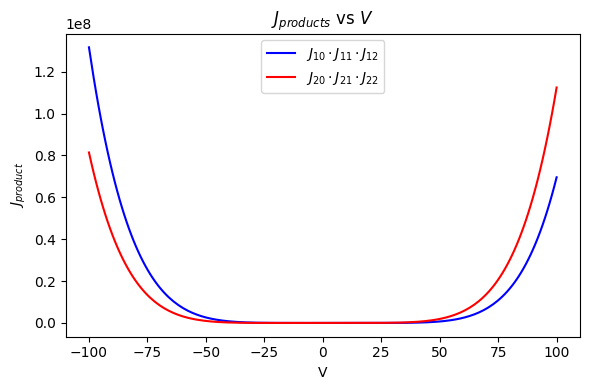

In [27]:
L = 1
R = 2

# Define V range
V_range = np.linspace(-100, 100, 200)  # Adjust the number of points as needed
alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

 # Create a figure
fig, ax = plt.subplots(figsize=(6, 4))


c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
Q = 0.01
J1_prd2 = J10 * J11 * J12
J2_prd2 = J20 * J21 * J12


# Plot on the corresponding subplot
ax.plot(V_range, J1_prd2, color='blue', label=f'$J_{{10}}\cdot J_{{11}} \cdot J_{{12}}$')
ax.plot(V_range, J2_prd2, color='red', label=f'$J_{{20}} \cdot J_{{21}} \cdot J_{{22}}$')

# Set the x and y axis labels
ax.set_xlabel('V')
ax.set_ylabel('$J_{{product}}$')
#axs[i-1].set_ylabel('$J$')
# Create the title dynamically based on the values of Vqmin and Vqmax

title = f'$J_{{products}}$ vs $V$'


ax.set_title(title)
ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


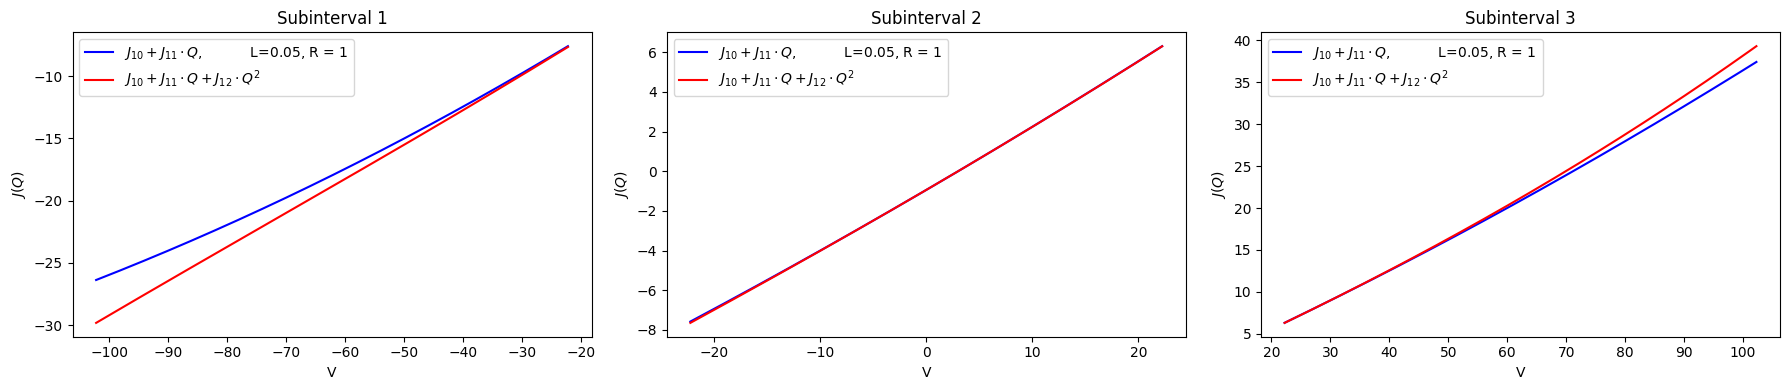

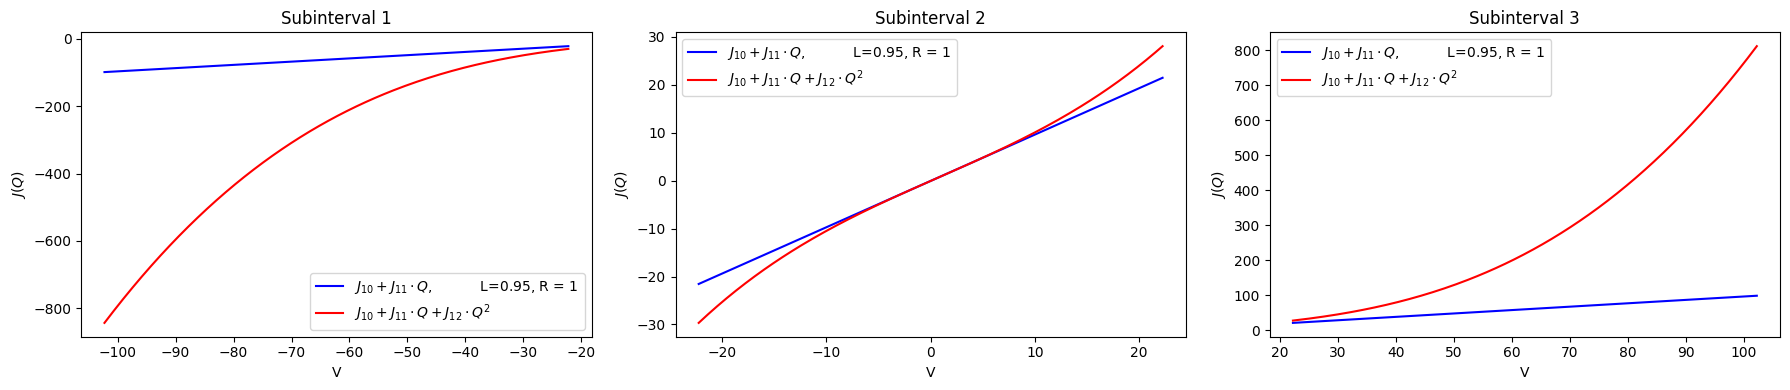

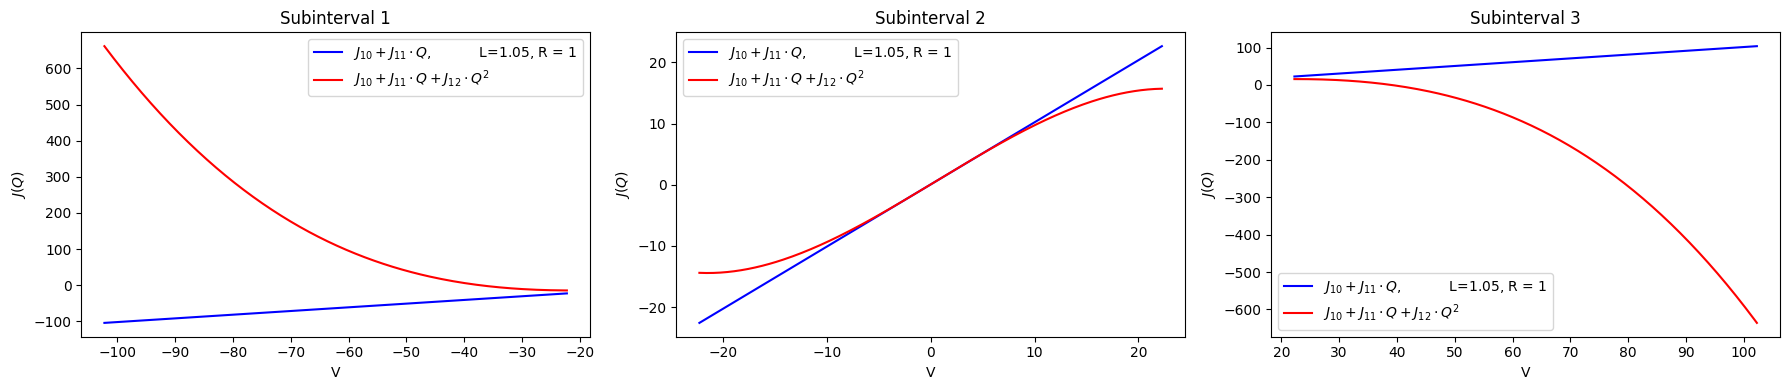

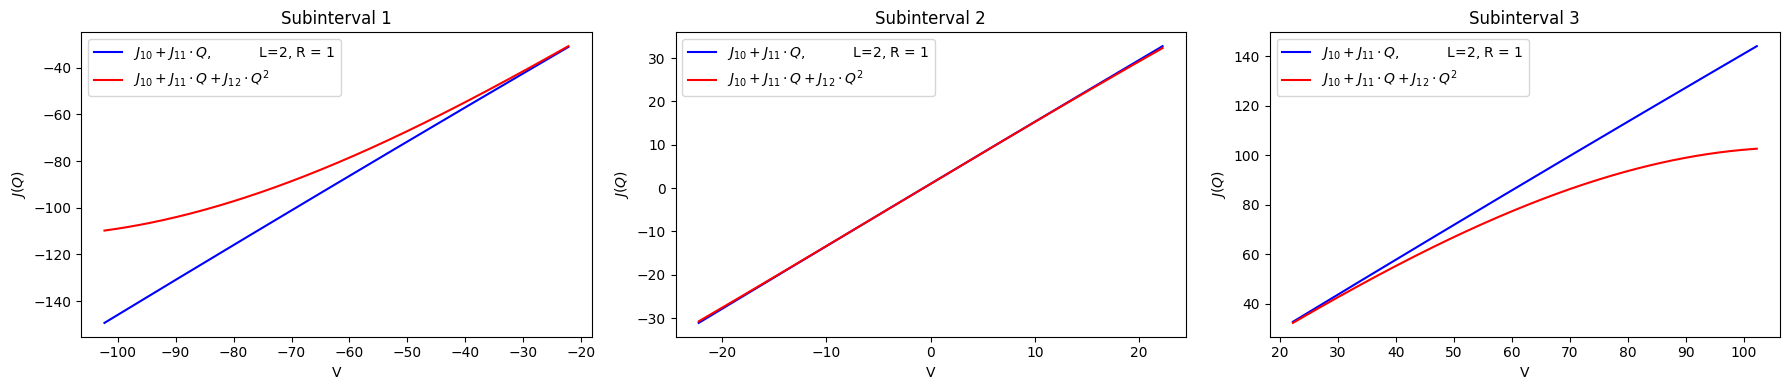

In [28]:
import matplotlib.pyplot as plt
import numpy as np

R = 1
for L in [0.05,  0.95, 1.05,  2]:
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)

    # Create a new figure for each L value
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    # Iterate over the ranges and call zeroth_order_terms
    for i, V_range in enumerate(V_ranges, 1):
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
        Q = 0.05
        J1_prd2 = J10 + Q * J11
        J2_prd2 = J10 + Q * J11 + Q**2 * J12
        ax.plot(V_range, J1_prd2, label=f'L={L}')
        ax.plot(V_range, J2_prd2, label=f'L={L}')

        # Plot on the corresponding subplot
        axs[i-1].plot(V_range, J1_prd2, color='blue', label=f'$J_{{10}} +  J_{{11}}\cdot Q, \qquad \quad $ L={L}, R = {R}')
        axs[i-1].plot(V_range, J2_prd2, color='red', label=f'$J_{{10}} + J_{{11}}\cdot Q +  J_{{12}} \cdot Q^2$')
        axs[i-1].set_title(f'Subinterval {i}')
        axs[i-1].set_xlabel('V')
        axs[i-1].set_ylabel('$J(Q)$')
        axs[i-1].legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the figure
    plt.show()

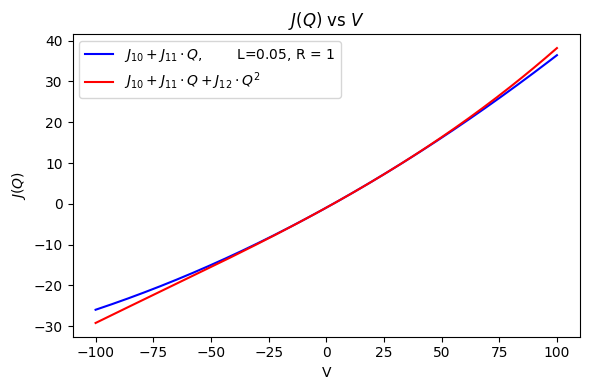

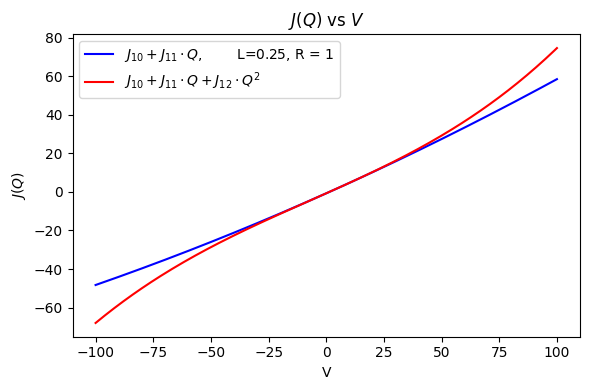

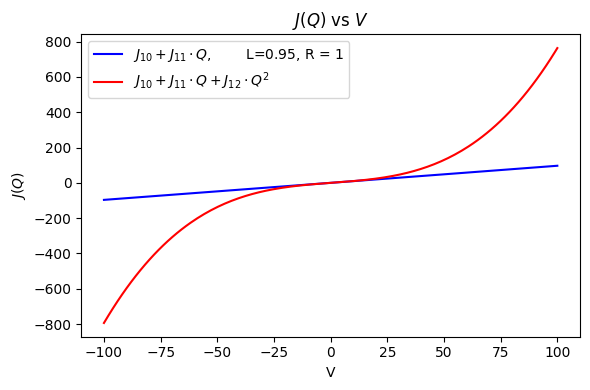

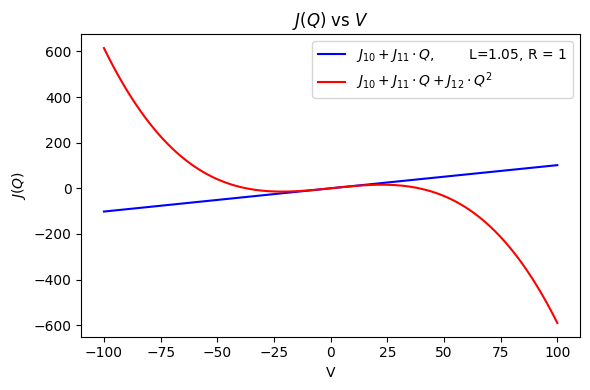

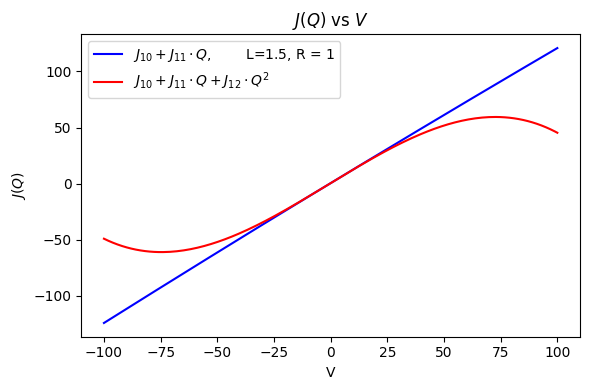

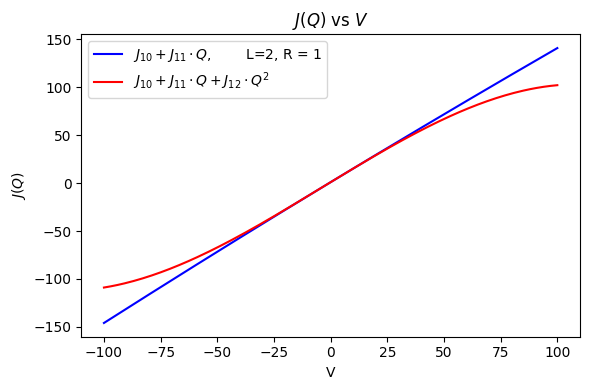

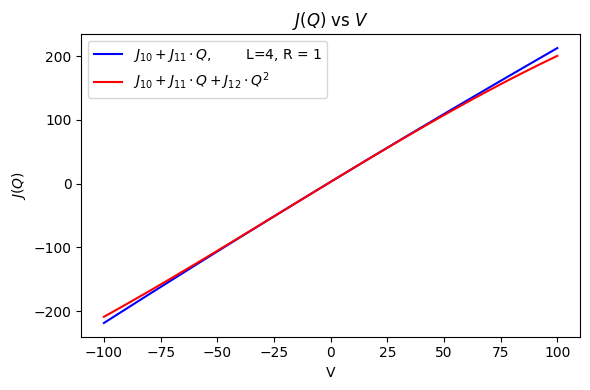

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter values
R = 1

# Define V range
V_range = np.linspace(-100, 100, 200)  # Adjust the number of points as needed

# Loop over L values and plot J1_product and J2_product for each L
for L in  [0.05, 0.25, 0.95, 1.05,  1.5, 2, 4]:
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)
    Q = 0.05
    J1_prd2 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)[-2] + Q * first_order_terms(V_range, alpha, beta, L, R, z1, z2)[-2]
    J2_prd2 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)[-2] + Q * first_order_terms(V_range, alpha, beta, L, R, z1, z2)[-2] + Q**2 * second_order_terms(V_range, alpha, beta, L, R, z1, z2)[-2]
    ax.plot(V_range, J1_prd2, label=f'L={L}')
    ax.plot(V_range, J2_prd2, label=f'L={L}')


    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot J1_product and J2_product for the current L value
    #x.plot(label=f'L={L}, R = {R}')
    ax.plot(V_range, J1_prd2, color='blue', label=f'$J_{{10}} + J_{{11}}\cdot Q,  \qquad$ L={L}, R = {R}')
    ax.plot(V_range, J2_prd2, color='red', label=f'$J_{{10}} + J_{{11}}\cdot Q +  J_{{12}}\cdot Q^2 $')

    # Set the x and y axis labels
    ax.set_xlabel('V')
    ax.set_ylabel('$J(Q)$')

    # Create a title and legend
    title = '$J(Q)$ vs $V$'
    ax.set_title(title)
    ax.legend()

    # Display the figure
    plt.tight_layout()
    plt.show()
